In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
df=pd.read_excel('final_data.xlsx', sheet_name='Sheet1')
df.head()

,Fine,Organic matter,Field/lab,Sand (%),Site label,Medium,Coarse,Organic carbon,Textural class,Silt (%),...,Soil name,Ksat,Units,Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Depth (cm),Horizon
0,6.3,5.5,Lab,25.8,I/1,5.2,6,NaN,NaN,59.4,...,Groseclose,0.000008,NaN,3.5,1.24,4.9,4.0,5.4,0,NaN
1,2.9,0.7,Lab,16.1,I/1,3.6,3.8,NaN,NaN,36,...,Groseclose,0.000004,NaN,2.9,1.45,3.0,4.0,5.4,50,NaN
2,5.5,4.5,Lab,26.9,I/2,5.2,4.7,NaN,NaN,60.5,...,Groseclose,0.000004,NaN,6.1,1.35,5.2,4.0,5.4,0,NaN
3,1.7,0.4,Lab,8.6,I/2,1.4,1.4,NaN,NaN,34.5,...,Groseclose,0.0,NaN,1.6,1.41,2.5,4.0,5.4,50,NaN
4,6.5,5.2,Lab,25.1,I/3,4.9,4.5,NaN,NaN,60.9,...,Groseclose,0.000001,NaN,6.1,1.25,3.0,4.0,5.4,0,NaN


In [3]:
df.shape

(20648, 22)

In [4]:
t=(df.isnull().sum()/df.shape[0])*100
t[t>0].sort_values(ascending=False)

Organic matter          99.530221
Soil name               89.393646
Organic carbon           7.162921
Very coarse              6.203991
Textural class           6.092600
Coarse                   6.010267
Fine                     6.010267
Medium                   6.010267
Very fine                5.806858
Sand (%)                 2.479659
Clay (%)                 2.469973
Silt  (%)                2.469973
Horizon                  2.450601
Depth (cm)               1.651492
Bulk density             0.910500
Units                    0.779737
Site label               0.353545
Sample Height (cm)       0.067803
Field/lab                0.029059
Sample diameter (cm)     0.029059
dtype: float64

In [5]:
df.dtypes

Fine                    float64
Organic matter          float64
Field/lab                object
Sand (%)                 object
Site label               object
Medium                  float64
Coarse                   object
Organic carbon          float64
Textural class           object
Silt  (%)                object
Clay (%)                 object
Method                   object
Soil name                object
Ksat                     object
Units                    object
Very coarse              object
Bulk density             object
Very fine               float64
Sample Height (cm)      float64
Sample diameter (cm)    float64
Depth (cm)               object
Horizon                  object
dtype: object

Thinking to drop

Site label, Organic matter, Unit,Ksat

# Cleaning KSAT

In [6]:
df.drop(df.loc[df['Units'].isnull()].index, inplace=True)

In [7]:
df.shape

(20487, 22)

In [8]:
df['Ksat'].tail(100)

20538    12.0±6.3
20539    17.8±3.4
20540    18.2±3.0
20541    19.3±3.1
20542    21.8±2.7
           ...   
20633     7.00001
20634     7.00001
20635     8.00001
20636     8.00001
20637     8.00001
Name: Ksat, Length: 100, dtype: object

In [9]:
#All the values with a,b,c in ksat are dropped 
df = df[~df['Ksat'].astype(str).str.contains(r'[abc]', na=False)].reset_index(drop=True)


In [10]:
#This line cleans the 'Ksat' column by removing any text after and including the ± symbol, keeping only the main numeric value.
df['Ksat'] = df['Ksat'].astype(str).str.replace(r'(\d+(\.\d+)?)\s*±.*', r'\1', regex=True)


In [11]:
df.isnull().sum()

Fine                     1124
Organic matter          20434
Field/lab                   6
Sand (%)                  428
Site label                 65
Medium                   1124
Coarse                   1124
Organic carbon           1294
Textural class           1076
Silt  (%)                 426
Clay (%)                  426
Method                      0
Soil name               18456
Ksat                        0
Units                       0
Very coarse              1164
Bulk density              104
Very fine                1082
Sample Height (cm)          4
Sample diameter (cm)        4
Depth (cm)                341
Horizon                   353
dtype: int64

In [12]:
# This function evaluates expressions in the 'Ksat' column that contain 'X' or 'x' as multiplication symbols.
import re

def evaluate_ksat(value):
    if isinstance(value, str) and re.search(r'[Xx]', value):
        try:
            expr = re.sub(r'[Xx]', '*', value)
            expr = expr.replace('^', '**')
            return eval(expr)
        except:
            return None
    return value  # return unchanged if not matching

# Apply to the 'Ksat' column
df['Ksat'] = df['Ksat'].apply(evaluate_ksat)
df.drop(df.loc[df['Ksat'].isnull()].index, inplace=True)

In [13]:
df.isnull().sum()

Fine                     1124
Organic matter          20430
Field/lab                   6
Sand (%)                  428
Site label                 65
Medium                   1124
Coarse                   1124
Organic carbon           1290
Textural class           1072
Silt  (%)                 426
Clay (%)                  426
Method                      0
Soil name               18456
Ksat                        0
Units                       0
Very coarse              1164
Bulk density              104
Very fine                1082
Sample Height (cm)          4
Sample diameter (cm)        4
Depth (cm)                341
Horizon                   353
dtype: int64

In [14]:
df['Ksat'].tail(100)

20356       12.0
20357       17.8
20358       18.2
20359       19.3
20360       21.8
          ...   
20451    7.00001
20452    7.00001
20453    8.00001
20454    8.00001
20455    8.00001
Name: Ksat, Length: 100, dtype: object

In [15]:
def convert_ksat_to_decimal(value):
    """
    Cleans and converts Ksat values from malformed scientific notation to float (decimal).
    """
    if isinstance(value, str):
        # Standardize string: remove spaces, fix comma, and replace common typos
        value = value.replace(' ', '')            # Remove spaces
        value = value.replace(',', '.')           # Replace comma with period
        value = value.replace('E—', 'E-')          # Fix long dash
        value = value.replace('OO', '00')          # Replace letter O with zero (for double-O)
        value = value.replace('O', '0')            # Replace any single letter O with zero
        value = value.replace('l', '1')            # Replace lowercase L with 1

        try:
            return float(value)
        except ValueError:
            return None  # Return None if still unconvertible
    return value
df['Ksat'] = df['Ksat'].apply(convert_ksat_to_decimal)


In [16]:
df.isnull().sum()

Fine                     1124
Organic matter          20430
Field/lab                   6
Sand (%)                  428
Site label                 65
Medium                   1124
Coarse                   1124
Organic carbon           1290
Textural class           1072
Silt  (%)                 426
Clay (%)                  426
Method                      0
Soil name               18456
Ksat                        1
Units                       0
Very coarse              1164
Bulk density              104
Very fine                1082
Sample Height (cm)          4
Sample diameter (cm)        4
Depth (cm)                341
Horizon                   353
dtype: int64

In [17]:
df.shape

(20452, 22)

In [18]:
df['Ksat'].tail(100)

20356    12.00000
20357    17.80000
20358    18.20000
20359    19.30000
20360    21.80000
           ...   
20451     7.00001
20452     7.00001
20453     8.00001
20454     8.00001
20455     8.00001
Name: Ksat, Length: 100, dtype: float64

In [19]:

# Assuming 'Ksat' column contains values like '9.8±4.0' or '10±2', etc.
df['Ksat'] = df['Ksat'].astype(str)





In [20]:
df['Ksat'].tail(100)

20356       12.0
20357       17.8
20358       18.2
20359       19.3
20360       21.8
          ...   
20451    7.00001
20452    7.00001
20453    8.00001
20454    8.00001
20455    8.00001
Name: Ksat, Length: 100, dtype: object

In [21]:
df.shape

(20452, 22)

In [22]:
df['Ksat'].tail(20)

20436                 0.00019
20437                   9e-05
20438                 0.00016
20439                 0.00025
20440                 0.00012
20441    0.044000000000000004
20442                   0.007
20443                 0.00034
20444                 0.00041
20445                 0.00035
20446                 0.00068
20447                63.00001
20448                63.00001
20449                63.00001
20450                 7.00001
20451                 7.00001
20452                 7.00001
20453                 8.00001
20454                 8.00001
20455                 8.00001
Name: Ksat, dtype: object

In [23]:
df.isnull().sum()

Fine                     1124
Organic matter          20430
Field/lab                   6
Sand (%)                  428
Site label                 65
Medium                   1124
Coarse                   1124
Organic carbon           1290
Textural class           1072
Silt  (%)                 426
Clay (%)                  426
Method                      0
Soil name               18456
Ksat                        0
Units                       0
Very coarse              1164
Bulk density              104
Very fine                1082
Sample Height (cm)          4
Sample diameter (cm)        4
Depth (cm)                341
Horizon                   353
dtype: int64

In [24]:
df.tail(10)

,Fine,Organic matter,Field/lab,Sand (%),Site label,Medium,Coarse,Organic carbon,Textural class,Silt (%),...,Soil name,Ksat,Units,Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Depth (cm),Horizon
20446,NaN,NaN,lab,88.8±0.5,NaN,NaN,NaN,NaN,sandy,10.9±0.6,...,Volkmar,0.00068,cm/s,NaN,1.71±0.05,NaN,2.0,5.0,74-76,NaN
20447,NaN,NaN,lab,61,Forest,NaN,NaN,NaN,NaN,26,...,NaN,63.00001,mm h^-1,NaN,0.83,NaN,7.5,7.5,0-7.5,A
20448,NaN,NaN,lab,60,Forest,NaN,NaN,NaN,NaN,25,...,NaN,63.00001,mm h^-1,NaN,1.08,NaN,7.5,7.5,7.5-15,A
20449,NaN,NaN,lab,60,Forest,NaN,NaN,NaN,NaN,26,...,NaN,63.00001,mm h^-1,NaN,0.96,NaN,7.5,7.5,ave,A
20450,NaN,NaN,lab,52,Lawn,NaN,NaN,NaN,NaN,28,...,NaN,7.00001,mm h^-1,NaN,1.23,NaN,7.5,7.5,0-7.6,A
20451,NaN,NaN,lab,58,Lawn,NaN,NaN,NaN,NaN,26,...,NaN,7.00001,mm h^-1,NaN,1.43,NaN,7.5,7.5,7.5-16,A
20452,NaN,NaN,lab,58,Lawn,NaN,NaN,NaN,NaN,27,...,NaN,7.00001,mm h^-1,NaN,1.33,NaN,7.5,7.5,ave,A
20453,NaN,NaN,lab,52,Pasture,NaN,NaN,NaN,NaN,32,...,NaN,8.00001,mm h^-1,NaN,0.83,NaN,7.5,7.5,0-7.7,A
20454,NaN,NaN,lab,52,Pasture,NaN,NaN,NaN,NaN,31,...,NaN,8.00001,mm h^-1,NaN,1.39,NaN,7.5,7.5,7.5-17,A
20455,NaN,NaN,lab,52,Pasture,NaN,NaN,NaN,NaN,31,...,NaN,8.00001,mm h^-1,NaN,0.96,NaN,7.5,7.5,ave,A


In [25]:
df.shape

(20452, 22)

In [26]:
df['Units'] = df['Units'].str.strip().str.replace(' ', '')


In [27]:
df['Units'].unique()

array(['cm/hr', 'mm/h', 'in/hr', 'log10(cm3/h)', 'md^-1', 'cmhr^-1',
       'cm/min', 'logms^-1', 'ums^-1', 'ms^-1', 'cm/day', 'mm/hr',
       'mday^-1', 'm/s', 'cm/s', 'mmh^-1'], dtype=object)

In [28]:
#Converting Ksat to cm/hr

def convert_ksat_to_cm_hr(df, ksat_col='Ksat', unit_col='Units'):
    """
    Converts Ksat values in a DataFrame to cm/hr, using the provided units.
    Assumes that Ksat is a numeric column stored as strings/objects.
    """
    # Conversion factors to cm/hr
    unit_to_cmhr = {
        'cm/hr': 1,
        'cmhr^-1': 1,
        'mm/h': 0.1,
        'mm/hr': 0.1,
        'mmh^-1': 0.1,
        'cm/min': 60,
        'cm/day': 1 / 24,
        'md^-1': 100 / 24,
        'mday^-1': 100 / 24,
        'm/s': 100 * 60 * 60,
        'ms^-1': 100 * 60 * 60,
        'cm/s': 60 * 60,
        'ums^-1': (1e-4) * 60 * 60,
        'in/hr': 2.54,
        'log10(cm3/h)': lambda x: 10 ** float(x),  # Assumes 1cm² area
        'logms^-1': lambda x: 10 ** float(x) * 100 * 60 * 60  # Convert log(m/s) to cm/hr
    }

    # Helper to apply conversion
    def convert(value, unit):
        try:
            if pd.isnull(value) or pd.isnull(unit):
                return np.nan
            if unit in ['log10(cm3/h)', 'logms^-1']:
                return unit_to_cmhr[unit](value)
            else:
                return float(value) * unit_to_cmhr.get(unit, np.nan)
        except:
            return np.nan

    # Apply the conversion
    df['Ksat_cm_hr'] = df.apply(lambda row: convert(row[ksat_col], row[unit_col]), axis=1)
    return df


In [29]:
convert_ksat_to_cm_hr(df)


,Fine,Organic matter,Field/lab,Sand (%),Site label,Medium,Coarse,Organic carbon,Textural class,Silt (%),...,Ksat,Units,Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Depth (cm),Horizon,Ksat_cm_hr
0,33.1,NaN,lab,85.1,"Forested, Turner Co",23.8,9.9,0.93,NaN,8.8,...,17.13,cm/hr,2.5,1.49,15.8,7.5,7.6,0-20,Ap,17.130000
1,32.3,NaN,lab,81.5,"Forested, Turner Co",23.0,9.6,0.58,NaN,8.8,...,2.69,cm/hr,1.8,1.69,14.8,7.5,7.6,30-38,Bw,2.690000
2,25.2,NaN,lab,65.6,"Forested, Turner Co",17.6,8.5,0.33,NaN,7.3,...,1.2,cm/hr,2.5,1.71,11.8,7.5,7.6,38-76,Bt,1.200000
3,21.1,NaN,lab,57.8,"Forested, Turner Co",15.7,7.6,0.20,NaN,5.4,...,0.39,cm/hr,2.7,1.7,10.7,7.5,7.6,76-129,Btv1,0.390000
4,25.7,NaN,lab,66.9,"Forested, Turner Co",17.2,7.7,0.13,NaN,5.7,...,0.18,cm/hr,1.8,1.9,14.5,7.5,7.6,129-160,Btv2,0.180000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20451,NaN,NaN,lab,58,Lawn,NaN,NaN,NaN,NaN,26,...,7.00001,mmh^-1,NaN,1.43,NaN,7.5,7.5,7.5-16,A,0.700001
20452,NaN,NaN,lab,58,Lawn,NaN,NaN,NaN,NaN,27,...,7.00001,mmh^-1,NaN,1.33,NaN,7.5,7.5,ave,A,0.700001
20453,NaN,NaN,lab,52,Pasture,NaN,NaN,NaN,NaN,32,...,8.00001,mmh^-1,NaN,0.83,NaN,7.5,7.5,0-7.7,A,0.800001
20454,NaN,NaN,lab,52,Pasture,NaN,NaN,NaN,NaN,31,...,8.00001,mmh^-1,NaN,1.39,NaN,7.5,7.5,7.5-17,A,0.800001


In [30]:
df.tail(10)

,Fine,Organic matter,Field/lab,Sand (%),Site label,Medium,Coarse,Organic carbon,Textural class,Silt (%),...,Ksat,Units,Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Depth (cm),Horizon,Ksat_cm_hr
20446,NaN,NaN,lab,88.8±0.5,NaN,NaN,NaN,NaN,sandy,10.9±0.6,...,0.00068,cm/s,NaN,1.71±0.05,NaN,2.0,5.0,74-76,NaN,2.448000
20447,NaN,NaN,lab,61,Forest,NaN,NaN,NaN,NaN,26,...,63.00001,mmh^-1,NaN,0.83,NaN,7.5,7.5,0-7.5,A,6.300001
20448,NaN,NaN,lab,60,Forest,NaN,NaN,NaN,NaN,25,...,63.00001,mmh^-1,NaN,1.08,NaN,7.5,7.5,7.5-15,A,6.300001
20449,NaN,NaN,lab,60,Forest,NaN,NaN,NaN,NaN,26,...,63.00001,mmh^-1,NaN,0.96,NaN,7.5,7.5,ave,A,6.300001
20450,NaN,NaN,lab,52,Lawn,NaN,NaN,NaN,NaN,28,...,7.00001,mmh^-1,NaN,1.23,NaN,7.5,7.5,0-7.6,A,0.700001
20451,NaN,NaN,lab,58,Lawn,NaN,NaN,NaN,NaN,26,...,7.00001,mmh^-1,NaN,1.43,NaN,7.5,7.5,7.5-16,A,0.700001
20452,NaN,NaN,lab,58,Lawn,NaN,NaN,NaN,NaN,27,...,7.00001,mmh^-1,NaN,1.33,NaN,7.5,7.5,ave,A,0.700001
20453,NaN,NaN,lab,52,Pasture,NaN,NaN,NaN,NaN,32,...,8.00001,mmh^-1,NaN,0.83,NaN,7.5,7.5,0-7.7,A,0.800001
20454,NaN,NaN,lab,52,Pasture,NaN,NaN,NaN,NaN,31,...,8.00001,mmh^-1,NaN,1.39,NaN,7.5,7.5,7.5-17,A,0.800001
20455,NaN,NaN,lab,52,Pasture,NaN,NaN,NaN,NaN,31,...,8.00001,mmh^-1,NaN,0.96,NaN,7.5,7.5,ave,A,0.800001


In [31]:
df.isnull().sum()

Fine                     1124
Organic matter          20430
Field/lab                   6
Sand (%)                  428
Site label                 65
Medium                   1124
Coarse                   1124
Organic carbon           1290
Textural class           1072
Silt  (%)                 426
Clay (%)                  426
Method                      0
Soil name               18456
Ksat                        0
Units                       0
Very coarse              1164
Bulk density              104
Very fine                1082
Sample Height (cm)          4
Sample diameter (cm)        4
Depth (cm)                341
Horizon                   353
Ksat_cm_hr                  1
dtype: int64

In [32]:
df.shape

(20452, 23)

In [33]:
# Show all rows in output
pd.set_option('display.max_rows', None)

# Filtering rows where Ksat_cm_hr is NaN and print only the Units column
missing_data = df[df['Ksat_cm_hr'].isna()]
print(missing_data)


      Fine  Organic matter Field/lab Sand (%) Site label  Medium Coarse  \
1070   NaN             NaN       lab      NaN        NaN     NaN    NaN   

      Organic carbon Textural class Silt  (%)  ... Ksat   Units Very coarse  \
1070             NaN      silt loam       NaN  ...  nan  cm/day         NaN   

     Bulk density Very fine Sample Height (cm) Sample diameter (cm)  \
1070     0.417174       NaN                0.4                 1.18   

      Depth (cm)  Horizon  Ksat_cm_hr  
1070     0 to 25       Ap         NaN  

[1 rows x 23 columns]


In [34]:
df['Ksat_cm_hr'].isnull().sum()

np.int64(1)

In [35]:
df.drop(df.loc[df['Ksat_cm_hr'].isnull()].index, inplace=True)

In [36]:
df['Ksat_cm_hr'].isnull().sum()

np.int64(0)

In [37]:
df.dtypes

Fine                    float64
Organic matter          float64
Field/lab                object
Sand (%)                 object
Site label               object
Medium                  float64
Coarse                   object
Organic carbon          float64
Textural class           object
Silt  (%)                object
Clay (%)                 object
Method                   object
Soil name                object
Ksat                     object
Units                    object
Very coarse              object
Bulk density             object
Very fine               float64
Sample Height (cm)      float64
Sample diameter (cm)    float64
Depth (cm)               object
Horizon                  object
Ksat_cm_hr              float64
dtype: object

In [38]:
#Site label, Organic matter, Unit,Ksat
df.drop(columns=['Site label', 'Organic matter', 'Units','Ksat'], inplace=True)

In [39]:
df.head()

,Fine,Field/lab,Sand (%),Medium,Coarse,Organic carbon,Textural class,Silt (%),Clay (%),Method,Soil name,Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Depth (cm),Horizon,Ksat_cm_hr
0,33.1,lab,85.1,23.8,9.9,0.93,NaN,8.8,6.1,constant head,Dothan,2.5,1.49,15.8,7.5,7.6,0-20,Ap,17.13
1,32.3,lab,81.5,23.0,9.6,0.58,NaN,8.8,9.7,constant head,Dothan,1.8,1.69,14.8,7.5,7.6,30-38,Bw,2.69
2,25.2,lab,65.6,17.6,8.5,0.33,NaN,7.3,27.1,constant head,Dothan,2.5,1.71,11.8,7.5,7.6,38-76,Bt,1.20
3,21.1,lab,57.8,15.7,7.6,0.20,NaN,5.4,36.8,constant head,Dothan,2.7,1.7,10.7,7.5,7.6,76-129,Btv1,0.39
4,25.7,lab,66.9,17.2,7.7,0.13,NaN,5.7,27.4,constant head,Dothan,1.8,1.9,14.5,7.5,7.6,129-160,Btv2,0.18


In [40]:
df.isnull().sum()

Fine                     1123
Field/lab                   6
Sand (%)                  427
Medium                   1123
Coarse                   1123
Organic carbon           1289
Textural class           1072
Silt  (%)                 425
Clay (%)                  425
Method                      0
Soil name               18456
Very coarse              1163
Bulk density              104
Very fine                1081
Sample Height (cm)          4
Sample diameter (cm)        4
Depth (cm)                341
Horizon                   353
Ksat_cm_hr                  0
dtype: int64

# Handling categorical data

In [41]:
cat_col=df[['Field/lab','Method','Soil name','Horizon']]

cat_col.dtypes

Field/lab    object
Method       object
Soil name    object
Horizon      object
dtype: object

In [42]:
#Different categories 
for col in cat_col:
    print(df[col].unique())

['lab' 'Lab' nan 'Field']
['constant head' 'Constant Head' 'hydraulic head' 'Constant head'
 'constant-head permeameter' 'pressure head' 'Constant head blocks'
 'constant head cores' 'falling head permeameter'
 'Uhland rings falling-head permeamter' 'Guelph permeameter'
 'falling-head method' 'constant-head method' 'constant-head'
 'falling head' 'permeameter' 'Constant Head Method' 'unknown']
['Dothan' 'Fuquay' 'Tifton' 'Loamy Sand' 'Sandy Loam'
 'Very Fine Sandy Loam' 'Fine Sandy Loam' 'Silt Loam' 'pedon'
 'Bayboro Clay loam' 'Bayboro Clay' 'Bladen Fine Sandy loam' 'Bladen Clay'
 'Bladen Sandy Clay' 'Bladen Sandy Clay Loam' 'Bladen Fine Sandy Loam'
 'Bladen Sandy Loam' 'Bladen Sandy loam' 'Bladen Loam' 'Bladen Loamy sand'
 'Bladen very fine sandy loam' 'Bladen Clay Loam'
 'Bladen Very Fine Sandy Loam' 'Capers Clay Loam' 'Capers Clay  '
 'Capers Clay' 'Charleston Loamy Sand' 'Chraleston Sandy Loam'
 'Chewacla Loam' 'Chewacla Silt Loam' 'Chewacla Loamy Sand'
 'Chewacla Sandy Clay' 'Che

In [43]:
df['Field/lab'].value_counts()

Field/lab
lab      19806
Lab        571
Field       68
Name: count, dtype: int64

In [44]:
df['Field/lab'].isnull().sum() 

np.int64(6)

In [45]:
# Replace missing values with 'lab'
df['Field/lab'].fillna('lab', inplace=True)

C:\Users\satya\AppData\Local\Temp\ipykernel_4452\4132791244.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Field/lab'].fillna('lab', inplace=True)


In [46]:
#Converting lab into Lab
df['Field/lab'] = df['Field/lab'].replace({'Lab': 'lab'})


In [47]:
df['Field/lab'].value_counts()

Field/lab
lab      20383
Field       68
Name: count, dtype: int64

# Handling Field/lab- applying encoding

In [48]:
#One-hot encodes the Field/lab column into new binary columns, concatenates them to df,
# and removes the original Field/lab column.
from sklearn.preprocessing import OneHotEncoder
import pandas as pd



encoder = OneHotEncoder(sparse_output=False, drop='if_binary')
one_hot_encoded = encoder.fit_transform(df['Field/lab'].values.reshape(-1, 1))
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Field/lab']))


one_hot_encoded_df.index = df.index

df = pd.concat([df, one_hot_encoded_df], axis=1)
df.drop(columns=['Field/lab'], inplace=True)
df.head()

,Fine,Sand (%),Medium,Coarse,Organic carbon,Textural class,Silt (%),Clay (%),Method,Soil name,Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Depth (cm),Horizon,Ksat_cm_hr,Field/lab_lab
0,33.1,85.1,23.8,9.9,0.93,NaN,8.8,6.1,constant head,Dothan,2.5,1.49,15.8,7.5,7.6,0-20,Ap,17.13,1.0
1,32.3,81.5,23.0,9.6,0.58,NaN,8.8,9.7,constant head,Dothan,1.8,1.69,14.8,7.5,7.6,30-38,Bw,2.69,1.0
2,25.2,65.6,17.6,8.5,0.33,NaN,7.3,27.1,constant head,Dothan,2.5,1.71,11.8,7.5,7.6,38-76,Bt,1.20,1.0
3,21.1,57.8,15.7,7.6,0.20,NaN,5.4,36.8,constant head,Dothan,2.7,1.7,10.7,7.5,7.6,76-129,Btv1,0.39,1.0
4,25.7,66.9,17.2,7.7,0.13,NaN,5.7,27.4,constant head,Dothan,1.8,1.9,14.5,7.5,7.6,129-160,Btv2,0.18,1.0


# Cleaning and Encoding Method column

In [49]:
df['Ksat_cm_hr'].isnull().sum()

np.int64(0)

In [50]:
df['Method'] = df['Method'].replace({'Constant Head': 'constant head','Constant head':'constant head','constant-head method':'constant head','constant-head':'constant head','Constant Head Method':'constant head','constant-head permeameter':'constant head','Constant head blocks':'constant head','constant head cores':'constant head','Uhland rings falling-head permeamter':'falling head','falling-head method':'falling head','falling head permeameter':'falling head','permeameter':'unknown','pressure head':'unknown','hydraulic head':'unknown','Guelph permeameter':'constant head'})


In [51]:
df['Method'].value_counts()

Method
constant head    20164
falling head       192
unknown             95
Name: count, dtype: int64

In [52]:
df['Method'].fillna('unknown', inplace=True)


C:\Users\satya\AppData\Local\Temp\ipykernel_4452\2884686051.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Method'].fillna('unknown', inplace=True)


In [53]:

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df['Method'].values.reshape(-1, 1))
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Method']))
one_hot_encoded_df.index = df.index

df=pd.concat([df, one_hot_encoded_df], axis=1)
df.drop(columns=['Method','Method_unknown'], inplace=True)
df.head()



,Fine,Sand (%),Medium,Coarse,Organic carbon,Textural class,Silt (%),Clay (%),Soil name,Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Depth (cm),Horizon,Ksat_cm_hr,Field/lab_lab,Method_constant head,Method_falling head
0,33.1,85.1,23.8,9.9,0.93,NaN,8.8,6.1,Dothan,2.5,1.49,15.8,7.5,7.6,0-20,Ap,17.13,1.0,1.0,0.0
1,32.3,81.5,23.0,9.6,0.58,NaN,8.8,9.7,Dothan,1.8,1.69,14.8,7.5,7.6,30-38,Bw,2.69,1.0,1.0,0.0
2,25.2,65.6,17.6,8.5,0.33,NaN,7.3,27.1,Dothan,2.5,1.71,11.8,7.5,7.6,38-76,Bt,1.20,1.0,1.0,0.0
3,21.1,57.8,15.7,7.6,0.20,NaN,5.4,36.8,Dothan,2.7,1.7,10.7,7.5,7.6,76-129,Btv1,0.39,1.0,1.0,0.0
4,25.7,66.9,17.2,7.7,0.13,NaN,5.7,27.4,Dothan,1.8,1.9,14.5,7.5,7.6,129-160,Btv2,0.18,1.0,1.0,0.0


# Dropping Textural class and Soil name column because of multicollinearity issue as we have Sand, Silt and Clay columns

In [54]:
df.drop(columns=['Soil name','Textural class'], inplace=True)

In [55]:
df.head()

,Fine,Sand (%),Medium,Coarse,Organic carbon,Silt (%),Clay (%),Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Depth (cm),Horizon,Ksat_cm_hr,Field/lab_lab,Method_constant head,Method_falling head
0,33.1,85.1,23.8,9.9,0.93,8.8,6.1,2.5,1.49,15.8,7.5,7.6,0-20,Ap,17.13,1.0,1.0,0.0
1,32.3,81.5,23.0,9.6,0.58,8.8,9.7,1.8,1.69,14.8,7.5,7.6,30-38,Bw,2.69,1.0,1.0,0.0
2,25.2,65.6,17.6,8.5,0.33,7.3,27.1,2.5,1.71,11.8,7.5,7.6,38-76,Bt,1.20,1.0,1.0,0.0
3,21.1,57.8,15.7,7.6,0.20,5.4,36.8,2.7,1.7,10.7,7.5,7.6,76-129,Btv1,0.39,1.0,1.0,0.0
4,25.7,66.9,17.2,7.7,0.13,5.7,27.4,1.8,1.9,14.5,7.5,7.6,129-160,Btv2,0.18,1.0,1.0,0.0


# Handling Horizon

In [56]:
df['Horizon'].value_counts()

Horizon
A                      1484
Ap                     1237
Bw1                    1207
Bw2                    1175
Eg                      832
Btg1                    621
Btg2                    571
Bw                      554
Bw3                     543
Eg1                     510
Bh1                     504
Bh2                     497
Eg2                     489
E                       437
Bt2                     407
Bt1                     405
Btg                     375
A2                      362
Bt                      361
A1                      346
Bh                      313
E/Eg                    310
Cg                      244
Bt3                     210
Bw4                     205
Btg3                    170
Cg1                     157
Cg2                     135
E2                      124
E1                      120
Eg3                     113
Bw/Bh                   103
Bt4                      95
Btv1                     88
Bh3                      83
C           

In [57]:
df['Horizon'].isnull().sum()

np.int64(353)

In [58]:
a=df['Horizon']
s=list(a)
x=[]
c=['O','A','E','B','C','R']
d=['OA','AE','BE','BC','CR']
t=[]
def checkhorizon(a):
    n=len(c)
    for i in range(n):
        if c[i] in s:
            x.append(c[i])
    if len(x)>1:
        for j in range(len(d)):
            if ''.join(x) in d[j] or ''.join(x[::-1]) in d[j]:
                t.append(d[j])
                return ''.join(t)
    elif len(x)==1:
            return ''.join(x)
checkhorizon(a)

In [59]:
df.shape[0]

20451

In [60]:
df['Horizon'] = df['Horizon'].astype(str)

a=df['Horizon']
# Valid letters and transitions
c = ['O', 'A', 'E', 'B', 'C', 'R']
d = ['OA', 'AE', 'EB', 'BC', 'CR']

# Function using your logic
def checkhorizon(a):
    s=list(a)
    x = []
    t = []
    n = len(c)

    for i in range(n):
        if c[i] in s:
            x.append(c[i])
    
    if len(x) > 1:
        for j in range(len(d)):
            if ''.join(x) in d[j] or ''.join(x[::-1]) in d[j]:
                t.append(d[j])
                return ''.join(t)
    elif len(x) == 1:
        return ''.join(x)
    return 'Unknown'

# Apply your logic to each row
df['Parsed_Horizon'] = df['Horizon'].apply(checkhorizon)

In [61]:
df['Parsed_Horizon'].value_counts()

Parsed_Horizon
B          10860
A           3908
E           3338
C           1160
Unknown      516
O            277
EB           231
BC           129
AE            32
Name: count, dtype: int64

In [62]:
#Label encoding to Parsed_horizon
labels={
    'O':0,
    'OA':1,
    'A':2,
    'AE':3,
    'E':4,
    'EB':5,
    'B':6,
    'BC':7,
    'C':8,
    'CR':9,
    'R':10,
    'Unknown':11
}
df['Horizon_label'] = df['Parsed_Horizon'].map(labels)
df.drop(columns=['Parsed_Horizon','Horizon'], inplace=True)

In [63]:
df.head()

,Fine,Sand (%),Medium,Coarse,Organic carbon,Silt (%),Clay (%),Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Depth (cm),Ksat_cm_hr,Field/lab_lab,Method_constant head,Method_falling head,Horizon_label
0,33.1,85.1,23.8,9.9,0.93,8.8,6.1,2.5,1.49,15.8,7.5,7.6,0-20,17.13,1.0,1.0,0.0,2
1,32.3,81.5,23.0,9.6,0.58,8.8,9.7,1.8,1.69,14.8,7.5,7.6,30-38,2.69,1.0,1.0,0.0,6
2,25.2,65.6,17.6,8.5,0.33,7.3,27.1,2.5,1.71,11.8,7.5,7.6,38-76,1.20,1.0,1.0,0.0,6
3,21.1,57.8,15.7,7.6,0.20,5.4,36.8,2.7,1.7,10.7,7.5,7.6,76-129,0.39,1.0,1.0,0.0,6
4,25.7,66.9,17.2,7.7,0.13,5.7,27.4,1.8,1.9,14.5,7.5,7.6,129-160,0.18,1.0,1.0,0.0,6


In [64]:
df['Ksat_cm_hr'].isnull().sum()

np.int64(0)

Handling Numerical columns

Cleaning Sand, Slit, clay column

In [65]:
df['Fine'].isnull().sum()

np.int64(1123)

In [66]:
#removing +/- sign 
df['Sand (%)'] = df['Sand (%)'].astype(str).str.replace(r'(\d+(\.\d+)?)\s*±.*', r'\1', regex=True)

df['Silt  (%)'] = df['Silt  (%)'].astype(str).str.replace(r'(\d+(\.\d+)?)\s*±.*', r'\1', regex=True)


In [67]:
#converting to numeric values, coercing any invalid parsing to NaN
df['Sand (%)'] = pd.to_numeric(df['Sand (%)'], errors='coerce')
df['Silt  (%)'] = pd.to_numeric(df['Silt  (%)'], errors='coerce')

In [68]:
df.dtypes

Fine                    float64
Sand (%)                float64
Medium                  float64
Coarse                   object
Organic carbon          float64
Silt  (%)               float64
Clay (%)                 object
Very coarse              object
Bulk density             object
Very fine               float64
Sample Height (cm)      float64
Sample diameter (cm)    float64
Depth (cm)               object
Ksat_cm_hr              float64
Field/lab_lab           float64
Method_constant head    float64
Method_falling head     float64
Horizon_label             int64
dtype: object

In [69]:
#dropping clay column
df.drop(columns=['Clay (%)'], inplace=True)

In [70]:
df.head(10)

,Fine,Sand (%),Medium,Coarse,Organic carbon,Silt (%),Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Depth (cm),Ksat_cm_hr,Field/lab_lab,Method_constant head,Method_falling head,Horizon_label
0,33.1,85.1,23.8,9.9,0.93,8.8,2.5,1.49,15.8,7.5,7.6,0-20,17.13,1.0,1.0,0.0,2
1,32.3,81.5,23.0,9.6,0.58,8.8,1.8,1.69,14.8,7.5,7.6,30-38,2.69,1.0,1.0,0.0,6
2,25.2,65.6,17.6,8.5,0.33,7.3,2.5,1.71,11.8,7.5,7.6,38-76,1.20,1.0,1.0,0.0,6
3,21.1,57.8,15.7,7.6,0.20,5.4,2.7,1.7,10.7,7.5,7.6,76-129,0.39,1.0,1.0,0.0,6
4,25.7,66.9,17.2,7.7,0.13,5.7,1.8,1.9,14.5,7.5,7.6,129-160,0.18,1.0,1.0,0.0,6
5,24.3,68.6,22.9,10.3,0.11,5.2,1.9,1.91,9.2,7.5,7.6,160-184,0.24,1.0,1.0,0.0,7
6,28.6,76.3,29.0,10.7,0.09,3.6,0.8,2.02,7.2,7.5,7.6,184-274,0.04,1.0,1.0,0.0,8
7,24.5,78.9,25.4,13.9,1.12,12.1,4.3,1.53,10.8,7.5,7.6,0-30,6.25,1.0,1.0,0.0,2
8,18.8,59.0,18.9,10.5,0.35,8.5,3.3,1.58,7.5,7.5,7.6,30-81,2.51,1.0,1.0,0.0,6
9,15.6,47.6,14.5,7.5,0.21,8.9,2.6,1.55,7.4,7.5,7.6,81-104,2.16,1.0,1.0,0.0,6


# Handling fine, medium, coarse, organic carbon, very coarse, bulk density, very fine, sample height, sample diameter, depth

In [71]:
df.isnull().sum()

Fine                    1123
Sand (%)                 427
Medium                  1123
Coarse                  1123
Organic carbon          1289
Silt  (%)                426
Very coarse             1163
Bulk density             104
Very fine               1081
Sample Height (cm)         4
Sample diameter (cm)       4
Depth (cm)               341
Ksat_cm_hr                 0
Field/lab_lab              0
Method_constant head       0
Method_falling head        0
Horizon_label              0
dtype: int64

In [72]:
df.dtypes

Fine                    float64
Sand (%)                float64
Medium                  float64
Coarse                   object
Organic carbon          float64
Silt  (%)               float64
Very coarse              object
Bulk density             object
Very fine               float64
Sample Height (cm)      float64
Sample diameter (cm)    float64
Depth (cm)               object
Ksat_cm_hr              float64
Field/lab_lab           float64
Method_constant head    float64
Method_falling head     float64
Horizon_label             int64
dtype: object

In [73]:
# Converting the 'Coarse' column to numeric values, coercing any invalid parsing to NaN
df['Coarse'] = pd.to_numeric(df['Coarse'], errors='coerce')

# Converting the 'Very coarse' column to numeric values, coercing any invalid parsing to NaN
df['Very coarse'] = pd.to_numeric(df['Very coarse'], errors='coerce')

# Clean the 'Bulk density' column by removing uncertainty values (e.g., "± value")
# Retain only the numeric part using a regular expression
df['Bulk density'] = df['Bulk density'].astype(str).str.replace(r'(\d+(\.\d+)?)\s*±.*', r'\1', regex=True)

# Converting the cleaned 'Bulk density' column to numeric values, coercing any invalid parsing to NaN
df['Bulk density'] = pd.to_numeric(df['Bulk density'], errors='coerce')

In [74]:
df.dtypes

Fine                    float64
Sand (%)                float64
Medium                  float64
Coarse                  float64
Organic carbon          float64
Silt  (%)               float64
Very coarse             float64
Bulk density            float64
Very fine               float64
Sample Height (cm)      float64
Sample diameter (cm)    float64
Depth (cm)               object
Ksat_cm_hr              float64
Field/lab_lab           float64
Method_constant head    float64
Method_falling head     float64
Horizon_label             int64
dtype: object

In [75]:
df.head(10)

,Fine,Sand (%),Medium,Coarse,Organic carbon,Silt (%),Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Depth (cm),Ksat_cm_hr,Field/lab_lab,Method_constant head,Method_falling head,Horizon_label
0,33.1,85.1,23.8,9.9,0.93,8.8,2.5,1.49,15.8,7.5,7.6,0-20,17.13,1.0,1.0,0.0,2
1,32.3,81.5,23.0,9.6,0.58,8.8,1.8,1.69,14.8,7.5,7.6,30-38,2.69,1.0,1.0,0.0,6
2,25.2,65.6,17.6,8.5,0.33,7.3,2.5,1.71,11.8,7.5,7.6,38-76,1.20,1.0,1.0,0.0,6
3,21.1,57.8,15.7,7.6,0.20,5.4,2.7,1.70,10.7,7.5,7.6,76-129,0.39,1.0,1.0,0.0,6
4,25.7,66.9,17.2,7.7,0.13,5.7,1.8,1.90,14.5,7.5,7.6,129-160,0.18,1.0,1.0,0.0,6
5,24.3,68.6,22.9,10.3,0.11,5.2,1.9,1.91,9.2,7.5,7.6,160-184,0.24,1.0,1.0,0.0,7
6,28.6,76.3,29.0,10.7,0.09,3.6,0.8,2.02,7.2,7.5,7.6,184-274,0.04,1.0,1.0,0.0,8
7,24.5,78.9,25.4,13.9,1.12,12.1,4.3,1.53,10.8,7.5,7.6,0-30,6.25,1.0,1.0,0.0,2
8,18.8,59.0,18.9,10.5,0.35,8.5,3.3,1.58,7.5,7.5,7.6,30-81,2.51,1.0,1.0,0.0,6
9,15.6,47.6,14.5,7.5,0.21,8.9,2.6,1.55,7.4,7.5,7.6,81-104,2.16,1.0,1.0,0.0,6


Handling depth cm

In [76]:
df.shape

(20451, 17)

In [77]:
# This function calculates the midpoint of a range (e.g., "0.5 to 1.0") from a string, 
# cleaning it of unwanted characters (e.g., "cm", "+", "*"), and handles cases where the input
def get_midpoint(value):
    d = re.sub(r"(cm|\+|\*|>| )", '', value, flags=re.IGNORECASE)

    if re.search(r'[a-zA-Z]', d) and not re.search(r'to', d):
        return None
    else:
        b = re.split(r"—|-|\.\.|to", d)
        if b is not None:
            try:
                b = [item for item in b if item]  # Remove empty strings from split
                b = list(map(float, b))
                print(b)
                if len(b) == 2:
                    return (b[0] + b[1]) / 2
                elif len(b) == 1:
                    return b[0]
                else:
                    return None
            except ValueError:
                return None
        else:
            return None



In [78]:
df['Depth (cm)'].isnull().sum()

np.int64(341)

In [79]:
df['Depth (cm)'] = df['Depth (cm)'].astype(str)
df['Clean_Depth (cm)'] = df['Depth (cm)'].apply(get_midpoint)

[0.0, 20.0]
[30.0, 38.0]
[38.0, 76.0]
[76.0, 129.0]
[129.0, 160.0]
[160.0, 184.0]
[184.0, 274.0]
[0.0, 30.0]
[30.0, 81.0]
[81.0, 104.0]
[104.0, 125.0]
[125.0, 151.0]
[151.0, 180.0]
[180.0, 211.0]
[0.0, 25.0]
[25.0, 65.0]
[65.0, 82.0]
[82.0, 136.0]
[136.0, 170.0]
[170.0, 186.0]
[186.0, 260.0]
[0.0, 33.0]
[33.0, 90.0]
[90.0, 106.0]
[106.0, 128.0]
[128.0, 156.0]
[156.0, 177.0]
[177.0, 214.0]
[0.0, 10.0]
[31.0, 38.0]
[38.0, 69.0]
[69.0, 88.0]
[88.0, 111.0]
[111.0, 148.0]
[148.0, 178.0]
[178.0, 244.0]
[0.0, 29.0]
[29.0, 41.0]
[41.0, 78.0]
[78.0, 117.0]
[117.0, 138.0]
[138.0, 183.0]
[183.0, 218.0]
[58.0]
[91.0]
[140.0]
[35.0]
[100.0]
[150.0]
[32.0]
[100.0]
[145.0]
[46.0]
[99.0]
[147.0]
[56.0]
[100.0]
[150.0]
[51.0]
[91.0]
[127.0]
[25.0]
[81.0]
[127.0]
[38.0]
[91.0]
[137.0]
[36.0]
[89.0]
[132.0]
[0.0]
[20.0]
[70.0]
[90.0]
[120.0]
[150.0]
[180.0]
[210.0]
[240.0]
[270.0]
[300.0]
[330.0]
[360.0]
[390.0]
[420.0]
[15.0]
[30.0]
[50.0]
[70.0]
[90.0]
[110.0]
[140.0]
[15.0]
[50.0]
[70.0]
[90.0]
[110.0

In [80]:
df['Clean_Depth (cm)'].isnull().sum()

np.int64(346)

In [81]:
df.dtypes

Fine                    float64
Sand (%)                float64
Medium                  float64
Coarse                  float64
Organic carbon          float64
Silt  (%)               float64
Very coarse             float64
Bulk density            float64
Very fine               float64
Sample Height (cm)      float64
Sample diameter (cm)    float64
Depth (cm)               object
Ksat_cm_hr              float64
Field/lab_lab           float64
Method_constant head    float64
Method_falling head     float64
Horizon_label             int64
Clean_Depth (cm)        float64
dtype: object

In [82]:
df['Clean_Depth (cm)'] = pd.to_numeric(df['Clean_Depth (cm)'], errors='coerce')
df.drop(columns=['Depth (cm)'], inplace=True)
df.head(10)


,Fine,Sand (%),Medium,Coarse,Organic carbon,Silt (%),Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Ksat_cm_hr,Field/lab_lab,Method_constant head,Method_falling head,Horizon_label,Clean_Depth (cm)
0,33.1,85.1,23.8,9.9,0.93,8.8,2.5,1.49,15.8,7.5,7.6,17.13,1.0,1.0,0.0,2,10.0
1,32.3,81.5,23.0,9.6,0.58,8.8,1.8,1.69,14.8,7.5,7.6,2.69,1.0,1.0,0.0,6,34.0
2,25.2,65.6,17.6,8.5,0.33,7.3,2.5,1.71,11.8,7.5,7.6,1.20,1.0,1.0,0.0,6,57.0
3,21.1,57.8,15.7,7.6,0.20,5.4,2.7,1.70,10.7,7.5,7.6,0.39,1.0,1.0,0.0,6,102.5
4,25.7,66.9,17.2,7.7,0.13,5.7,1.8,1.90,14.5,7.5,7.6,0.18,1.0,1.0,0.0,6,144.5
5,24.3,68.6,22.9,10.3,0.11,5.2,1.9,1.91,9.2,7.5,7.6,0.24,1.0,1.0,0.0,7,172.0
6,28.6,76.3,29.0,10.7,0.09,3.6,0.8,2.02,7.2,7.5,7.6,0.04,1.0,1.0,0.0,8,229.0
7,24.5,78.9,25.4,13.9,1.12,12.1,4.3,1.53,10.8,7.5,7.6,6.25,1.0,1.0,0.0,2,15.0
8,18.8,59.0,18.9,10.5,0.35,8.5,3.3,1.58,7.5,7.5,7.6,2.51,1.0,1.0,0.0,6,55.5
9,15.6,47.6,14.5,7.5,0.21,8.9,2.6,1.55,7.4,7.5,7.6,2.16,1.0,1.0,0.0,6,92.5


EDA

In [83]:
df.dtypes

Fine                    float64
Sand (%)                float64
Medium                  float64
Coarse                  float64
Organic carbon          float64
Silt  (%)               float64
Very coarse             float64
Bulk density            float64
Very fine               float64
Sample Height (cm)      float64
Sample diameter (cm)    float64
Ksat_cm_hr              float64
Field/lab_lab           float64
Method_constant head    float64
Method_falling head     float64
Horizon_label             int64
Clean_Depth (cm)        float64
dtype: object

In [84]:
df.isnull().sum()

Fine                    1123
Sand (%)                 427
Medium                  1123
Coarse                  1124
Organic carbon          1289
Silt  (%)                426
Very coarse             1165
Bulk density             118
Very fine               1081
Sample Height (cm)         4
Sample diameter (cm)       4
Ksat_cm_hr                 0
Field/lab_lab              0
Method_constant head       0
Method_falling head        0
Horizon_label              0
Clean_Depth (cm)         346
dtype: int64

In [85]:
df=df.abs()

In [86]:
df.isnull().sum()

Fine                    1123
Sand (%)                 427
Medium                  1123
Coarse                  1124
Organic carbon          1289
Silt  (%)                426
Very coarse             1165
Bulk density             118
Very fine               1081
Sample Height (cm)         4
Sample diameter (cm)       4
Ksat_cm_hr                 0
Field/lab_lab              0
Method_constant head       0
Method_falling head        0
Horizon_label              0
Clean_Depth (cm)         346
dtype: int64

In [87]:
has_negatives = (df['Ksat_cm_hr'] < 0).any().any()
print("Does the DataFrame still have negatives?", has_negatives)  # Should be False


Does the DataFrame still have negatives? False


In [88]:
df.describe()

,Fine,Sand (%),Medium,Coarse,Organic carbon,Silt (%),Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Ksat_cm_hr,Field/lab_lab,Method_constant head,Method_falling head,Horizon_label,Clean_Depth (cm)
count,19328.000000,20024.000000,19328.000000,19327.000000,19162.000000,20025.000000,19286.000000,20333.000000,19370.000000,20447.000000,20447.000000,20451.000000,20451.000000,20451.000000,20451.000000,20451.000000,20105.000000
mean,49.613100,83.780866,20.795463,3.907784,1.152632,6.867838,0.410901,1.509737,10.362909,5.744918,3.483357,199.541680,0.996675,0.985966,0.009388,5.057846,78.901452
std,21.009066,28.160941,16.779942,4.960908,4.885259,10.161992,1.362744,0.400889,8.591830,4.065723,4.173190,7958.409309,0.057568,0.117632,0.096440,2.049349,58.823638
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011655,0.000000,0.000000,1.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.200000,77.600000,7.600000,0.600000,0.100000,2.000000,0.000000,1.440000,3.800000,5.400000,3.000000,1.678200,1.000000,1.000000,0.000000,4.000000,28.000000
50%,49.100000,91.600000,16.700000,2.100000,0.220000,4.100000,0.000000,1.540000,8.100000,5.400000,3.000000,12.300000,1.000000,1.000000,0.000000,6.000000,67.500000
75%,65.300000,96.000000,30.100000,5.200000,0.720000,7.100000,0.200000,1.630000,14.800000,5.400000,3.000000,31.195600,1.000000,1.000000,0.000000,6.000000,124.000000
max,98.100000,3050.000000,77.700000,60.000000,59.200000,94.500000,29.700000,35.200000,56.400000,76.200000,76.200000,360000.000000,1.000000,1.000000,1.000000,11.000000,420.000000


In [89]:
df.describe()

,Fine,Sand (%),Medium,Coarse,Organic carbon,Silt (%),Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Ksat_cm_hr,Field/lab_lab,Method_constant head,Method_falling head,Horizon_label,Clean_Depth (cm)
count,19328.000000,20024.000000,19328.000000,19327.000000,19162.000000,20025.000000,19286.000000,20333.000000,19370.000000,20447.000000,20447.000000,20451.000000,20451.000000,20451.000000,20451.000000,20451.000000,20105.000000
mean,49.613100,83.780866,20.795463,3.907784,1.152632,6.867838,0.410901,1.509737,10.362909,5.744918,3.483357,199.541680,0.996675,0.985966,0.009388,5.057846,78.901452
std,21.009066,28.160941,16.779942,4.960908,4.885259,10.161992,1.362744,0.400889,8.591830,4.065723,4.173190,7958.409309,0.057568,0.117632,0.096440,2.049349,58.823638
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011655,0.000000,0.000000,1.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.200000,77.600000,7.600000,0.600000,0.100000,2.000000,0.000000,1.440000,3.800000,5.400000,3.000000,1.678200,1.000000,1.000000,0.000000,4.000000,28.000000
50%,49.100000,91.600000,16.700000,2.100000,0.220000,4.100000,0.000000,1.540000,8.100000,5.400000,3.000000,12.300000,1.000000,1.000000,0.000000,6.000000,67.500000
75%,65.300000,96.000000,30.100000,5.200000,0.720000,7.100000,0.200000,1.630000,14.800000,5.400000,3.000000,31.195600,1.000000,1.000000,0.000000,6.000000,124.000000
max,98.100000,3050.000000,77.700000,60.000000,59.200000,94.500000,29.700000,35.200000,56.400000,76.200000,76.200000,360000.000000,1.000000,1.000000,1.000000,11.000000,420.000000


In [90]:
df.isnull().sum()

Fine                    1123
Sand (%)                 427
Medium                  1123
Coarse                  1124
Organic carbon          1289
Silt  (%)                426
Very coarse             1165
Bulk density             118
Very fine               1081
Sample Height (cm)         4
Sample diameter (cm)       4
Ksat_cm_hr                 0
Field/lab_lab              0
Method_constant head       0
Method_falling head        0
Horizon_label              0
Clean_Depth (cm)         346
dtype: int64

In [91]:
num_cols=df[['Fine','Sand (%)','Medium','Coarse','Organic carbon','Silt  (%)','Very coarse','Bulk density','Very fine','Sample Height (cm)','Sample diameter (cm)','Clean_Depth (cm)','Ksat_cm_hr']]
num_cols.head(10)

,Fine,Sand (%),Medium,Coarse,Organic carbon,Silt (%),Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Clean_Depth (cm),Ksat_cm_hr
0,33.1,85.1,23.8,9.9,0.93,8.8,2.5,1.49,15.8,7.5,7.6,10.0,17.13
1,32.3,81.5,23.0,9.6,0.58,8.8,1.8,1.69,14.8,7.5,7.6,34.0,2.69
2,25.2,65.6,17.6,8.5,0.33,7.3,2.5,1.71,11.8,7.5,7.6,57.0,1.20
3,21.1,57.8,15.7,7.6,0.20,5.4,2.7,1.70,10.7,7.5,7.6,102.5,0.39
4,25.7,66.9,17.2,7.7,0.13,5.7,1.8,1.90,14.5,7.5,7.6,144.5,0.18
5,24.3,68.6,22.9,10.3,0.11,5.2,1.9,1.91,9.2,7.5,7.6,172.0,0.24
6,28.6,76.3,29.0,10.7,0.09,3.6,0.8,2.02,7.2,7.5,7.6,229.0,0.04
7,24.5,78.9,25.4,13.9,1.12,12.1,4.3,1.53,10.8,7.5,7.6,15.0,6.25
8,18.8,59.0,18.9,10.5,0.35,8.5,3.3,1.58,7.5,7.5,7.6,55.5,2.51
9,15.6,47.6,14.5,7.5,0.21,8.9,2.6,1.55,7.4,7.5,7.6,92.5,2.16


In [92]:
# num_cols.shape

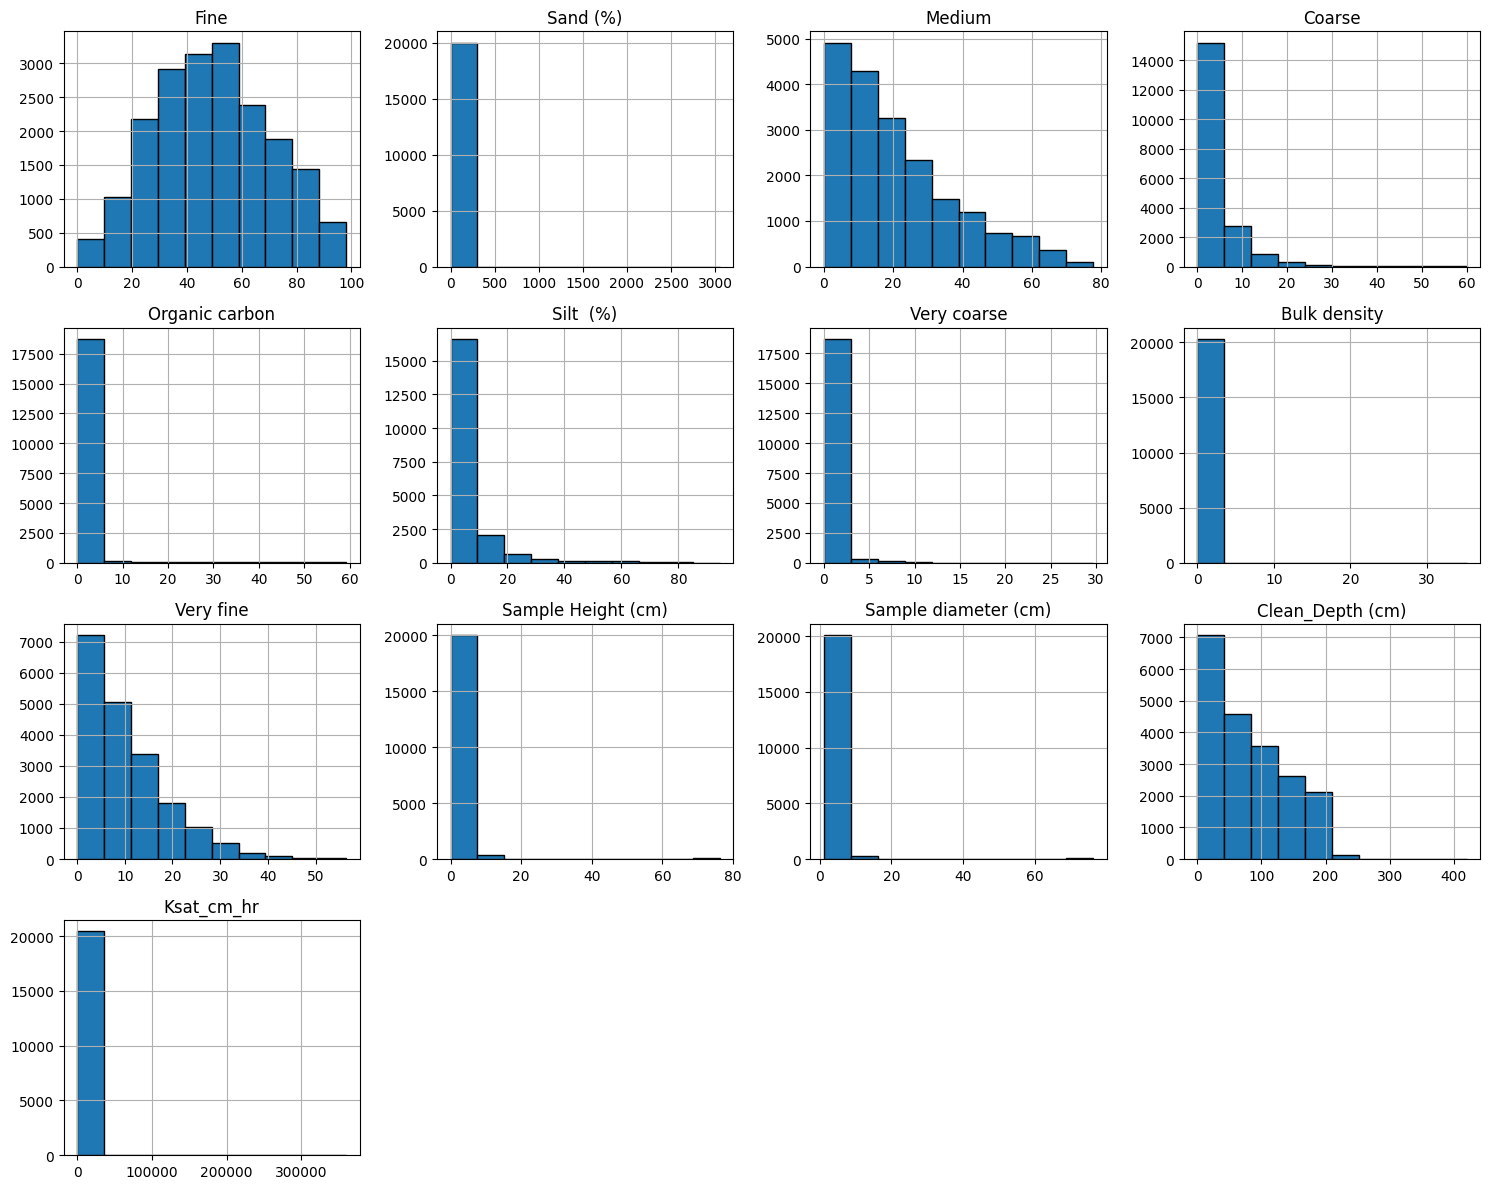

In [93]:
import matplotlib.pyplot as plt

# Set the figure size and layout
num_cols.hist(bins=10, figsize=(15, 12), edgecolor='black')
plt.tight_layout()
plt.show()


In [94]:
import scipy.stats as stats
import pylab

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Ksat_cm_hr']), df['Ksat_cm_hr'], test_size=0.2, random_state=42)


In [96]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16360, 16), (4091, 16), (16360,), (4091,))

In [97]:
print(X_train.isnull().sum())


Fine                     910
Sand (%)                 330
Medium                   910
Coarse                   911
Organic carbon          1066
Silt  (%)                330
Very coarse              946
Bulk density              89
Very fine                871
Sample Height (cm)         3
Sample diameter (cm)       3
Field/lab_lab              0
Method_constant head       0
Method_falling head        0
Horizon_label              0
Clean_Depth (cm)         282
dtype: int64


In [98]:
print(X_train.describe())

               Fine      Sand (%)        Medium        Coarse  Organic carbon  \
count  15450.000000  16030.000000  15450.000000  15449.000000    15294.000000   
mean      49.619353     83.729098     20.857408      3.907696        1.145271   
std       21.076167     30.115552     16.861933      4.970243        4.845365   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%       34.200000     77.500000      7.600000      0.600000        0.100000   
50%       49.100000     91.500000     16.700000      2.100000        0.220000   
75%       65.300000     96.000000     30.300000      5.200000        0.720000   
max       98.100000   3050.000000     77.700000     60.000000       59.200000   

          Silt  (%)   Very coarse  Bulk density     Very fine  \
count  16030.000000  15414.000000  16271.000000  15489.000000   
mean       6.927895      0.414683      1.510377     10.291026   
std       10.258481      1.399206      0.432332      8.564316   
min       

In [99]:
print(X_test.isnull().sum())

Fine                    213
Sand (%)                 97
Medium                  213
Coarse                  213
Organic carbon          223
Silt  (%)                96
Very coarse             219
Bulk density             29
Very fine               210
Sample Height (cm)        1
Sample diameter (cm)      1
Field/lab_lab             0
Method_constant head      0
Method_falling head       0
Horizon_label             0
Clean_Depth (cm)         64
dtype: int64


In [100]:
print(X_train.describe())

               Fine      Sand (%)        Medium        Coarse  Organic carbon  \
count  15450.000000  16030.000000  15450.000000  15449.000000    15294.000000   
mean      49.619353     83.729098     20.857408      3.907696        1.145271   
std       21.076167     30.115552     16.861933      4.970243        4.845365   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%       34.200000     77.500000      7.600000      0.600000        0.100000   
50%       49.100000     91.500000     16.700000      2.100000        0.220000   
75%       65.300000     96.000000     30.300000      5.200000        0.720000   
max       98.100000   3050.000000     77.700000     60.000000       59.200000   

          Silt  (%)   Very coarse  Bulk density     Very fine  \
count  16030.000000  15414.000000  16271.000000  15489.000000   
mean       6.927895      0.414683      1.510377     10.291026   
std       10.258481      1.399206      0.432332      8.564316   
min       

In [101]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=42,min_value=0)
X_train_imputed = imputer.fit_transform(X_train)

X_test_imputed = imputer.transform(X_test)


c:\Users\satya\Documents\data_science_roadmap\KSAT\venv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [102]:
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns, index=X_train.index)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns, index=X_test.index)


In [103]:
X_train_imputed.describe()

,Fine,Sand (%),Medium,Coarse,Organic carbon,Silt (%),Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Field/lab_lab,Method_constant head,Method_falling head,Horizon_label,Clean_Depth (cm)
count,16360.000000,16360.000000,16360.000000,16360.000000,16360.000000,16360.000000,16360.000000,16360.000000,16360.000000,16360.000000,16360.000000,16360.000000,16360.000000,16360.000000,16360.000000,16360.000000
mean,48.447032,83.695381,20.526049,4.184469,1.559824,7.485072,0.642709,1.510737,10.007413,5.745205,3.482493,0.996822,0.985758,0.009597,5.060269,78.709534
std,24.236305,30.016500,16.537549,5.190682,6.943333,11.147793,2.104853,0.432869,15.629958,4.022510,4.101166,0.056290,0.118491,0.097494,2.052978,58.920863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.180000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.700000,77.500000,7.600000,0.600000,0.100000,2.100000,0.000000,1.440000,3.400000,5.400000,3.000000,1.000000,1.000000,0.000000,4.000000,28.000000
50%,48.200000,91.500000,17.100000,2.200000,0.230000,4.200000,0.100000,1.540000,7.800000,5.400000,3.000000,1.000000,1.000000,0.000000,6.000000,67.500000
75%,64.900000,96.000000,29.300000,5.600000,0.800000,7.500000,0.300000,1.630000,14.200000,5.400000,3.000000,1.000000,1.000000,0.000000,6.000000,123.500000
max,1351.621533,3050.000000,77.700000,60.000000,360.858223,94.500000,29.700000,35.200000,1682.680659,76.200000,76.200000,1.000000,1.000000,1.000000,11.000000,420.000000


In [104]:
X_test_imputed.describe()

,Fine,Sand (%),Medium,Coarse,Organic carbon,Silt (%),Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Field/lab_lab,Method_constant head,Method_falling head,Horizon_label,Clean_Depth (cm)
count,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000
mean,48.685134,83.963925,20.310802,4.148094,1.538015,7.307933,0.616811,1.507890,10.303682,5.742512,3.487347,0.996089,0.986800,0.008555,5.048154,78.983755
std,21.418222,18.488119,16.126835,5.136664,6.469675,10.886690,2.062142,0.238786,8.687956,4.233140,4.448245,0.062423,0.114143,0.092110,2.034994,58.719727
min,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.180000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.850000,78.100000,7.900000,0.700000,0.100000,2.100000,0.000000,1.450000,3.800000,5.400000,3.000000,1.000000,1.000000,0.000000,4.000000,27.500000
50%,48.600000,91.700000,17.200000,2.200000,0.230000,4.100000,0.100000,1.550000,8.300000,5.400000,3.000000,1.000000,1.000000,0.000000,6.000000,68.500000
75%,64.200000,96.000000,28.650000,5.700000,0.760000,7.171335,0.300000,1.630000,14.600000,5.400000,3.000000,1.000000,1.000000,0.000000,6.000000,124.500000
max,97.300000,108.112951,77.700000,55.700000,111.441724,94.500000,26.996499,3.530000,53.500000,76.200000,76.200000,1.000000,1.000000,1.000000,11.000000,275.500000


# HANDLING OUTLIERS

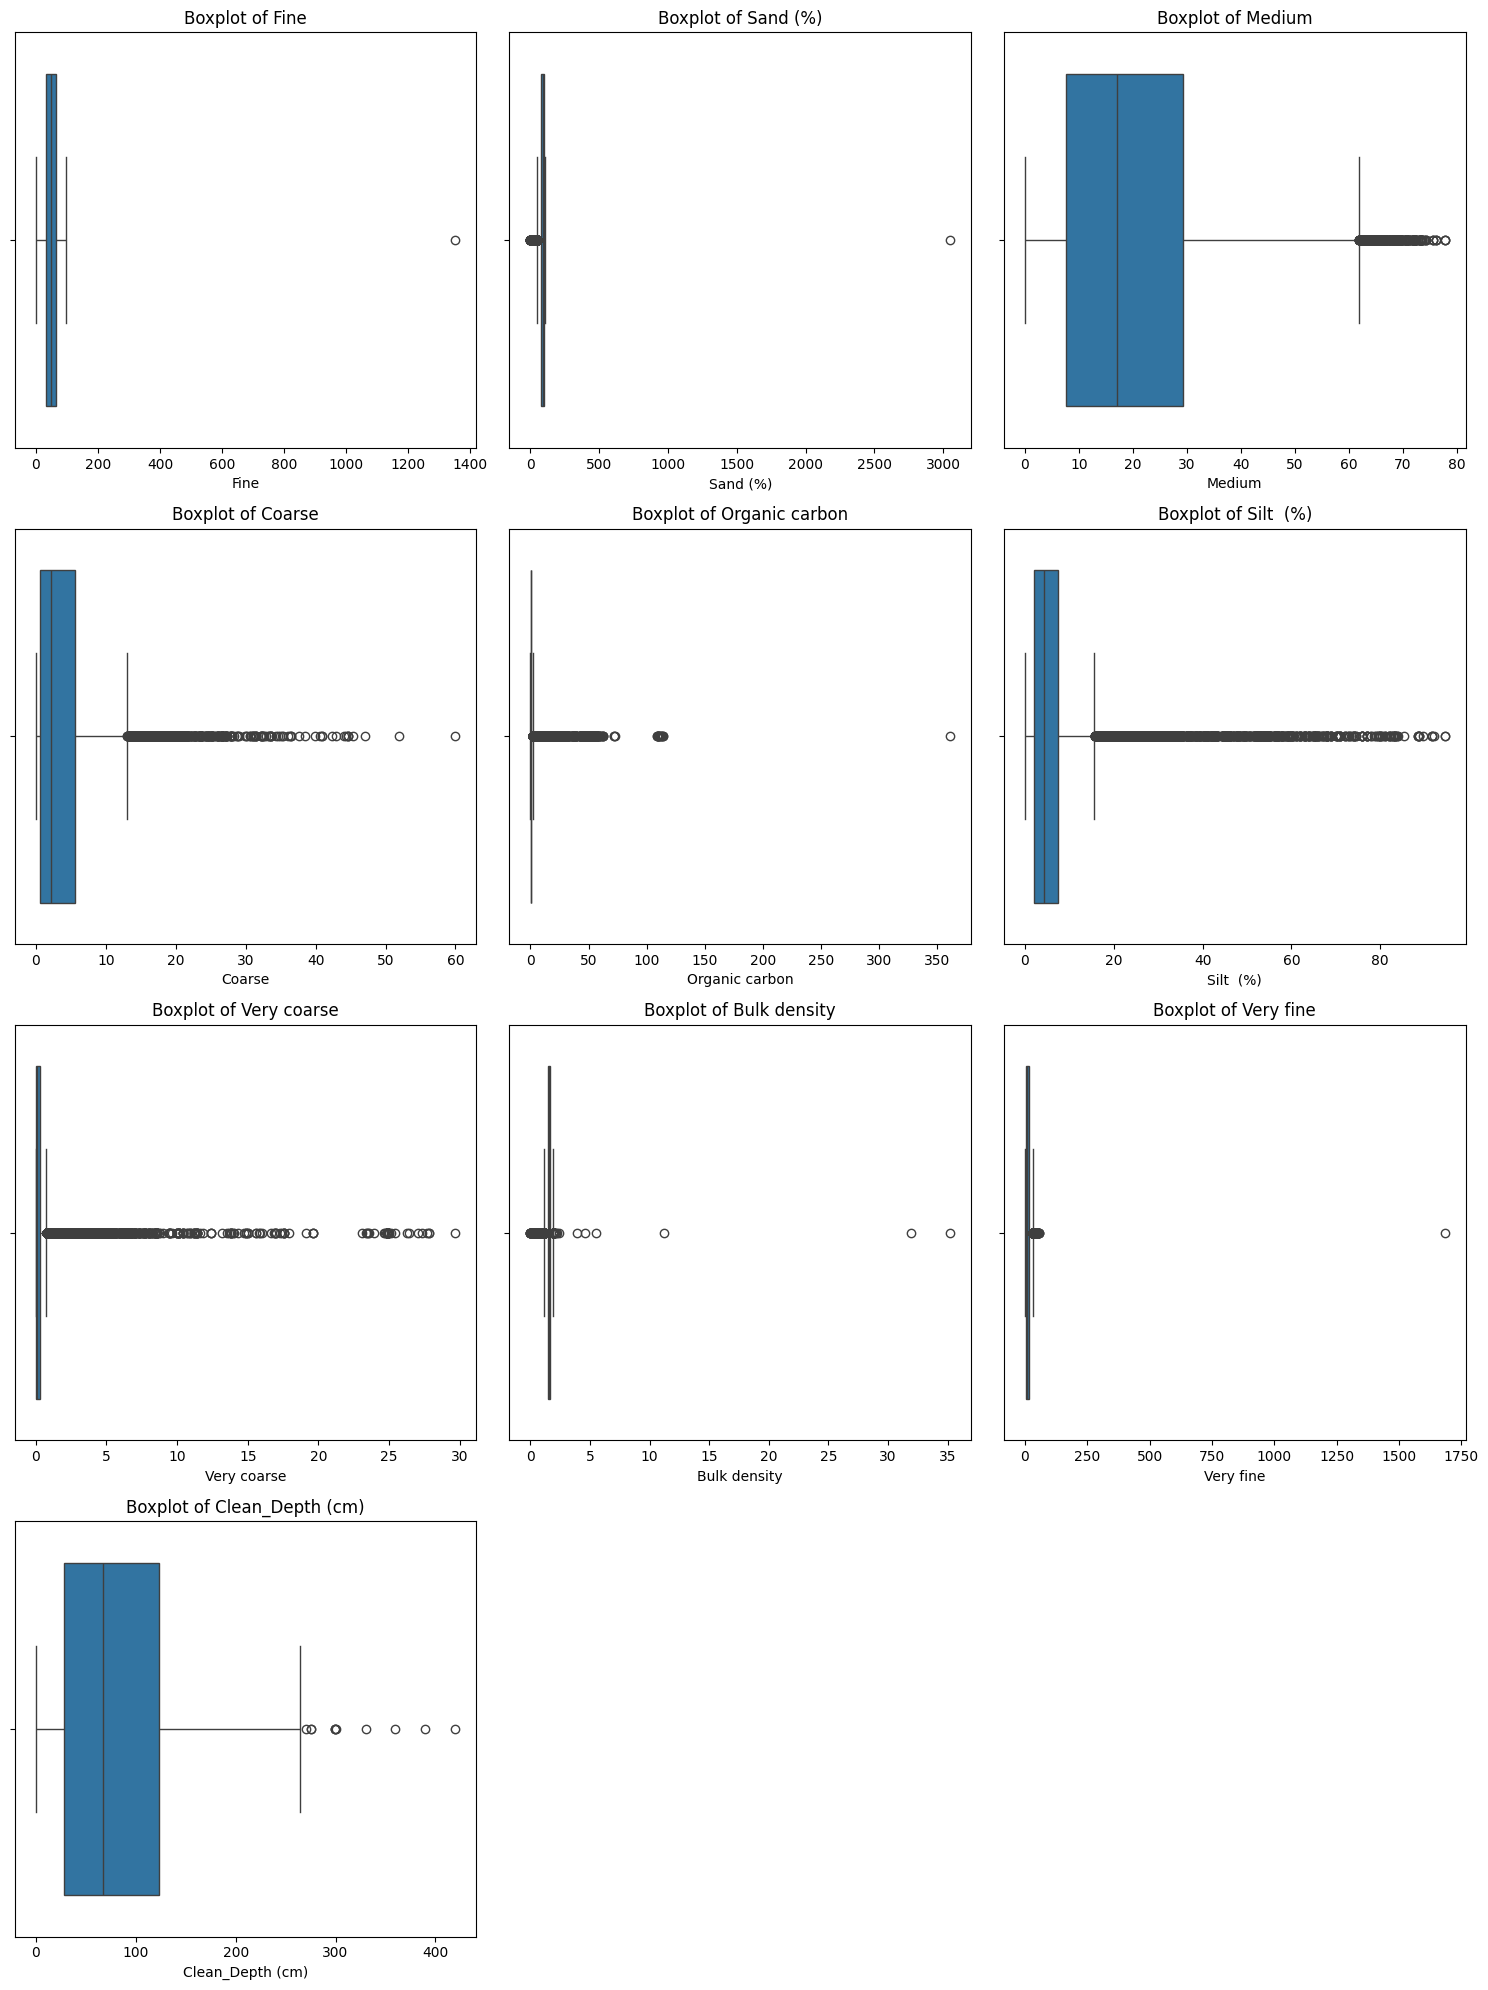

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
columns_to_check = ['Fine', 'Sand (%)', 'Medium', 'Coarse', 'Organic carbon', 'Silt  (%)',
                    'Very coarse', 'Bulk density', 'Very fine', 'Clean_Depth (cm)']
def plot_boxplots(df, columns, n_cols=3):
    """
    Plots boxplots for selected columns of a DataFrame.

    Parameters:
    - df: pandas DataFrame
    - columns: list of column names to plot
    - n_cols: number of plots per row
    """
    n_rows = (len(columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))

    axes = axes.flatten()  # Flatten in case of single row

    for i, col in enumerate(columns):
        sns.boxplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
    
    # Hide any extra subplots
    for j in range(len(columns), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_boxplots(X_train_imputed, columns_to_check)

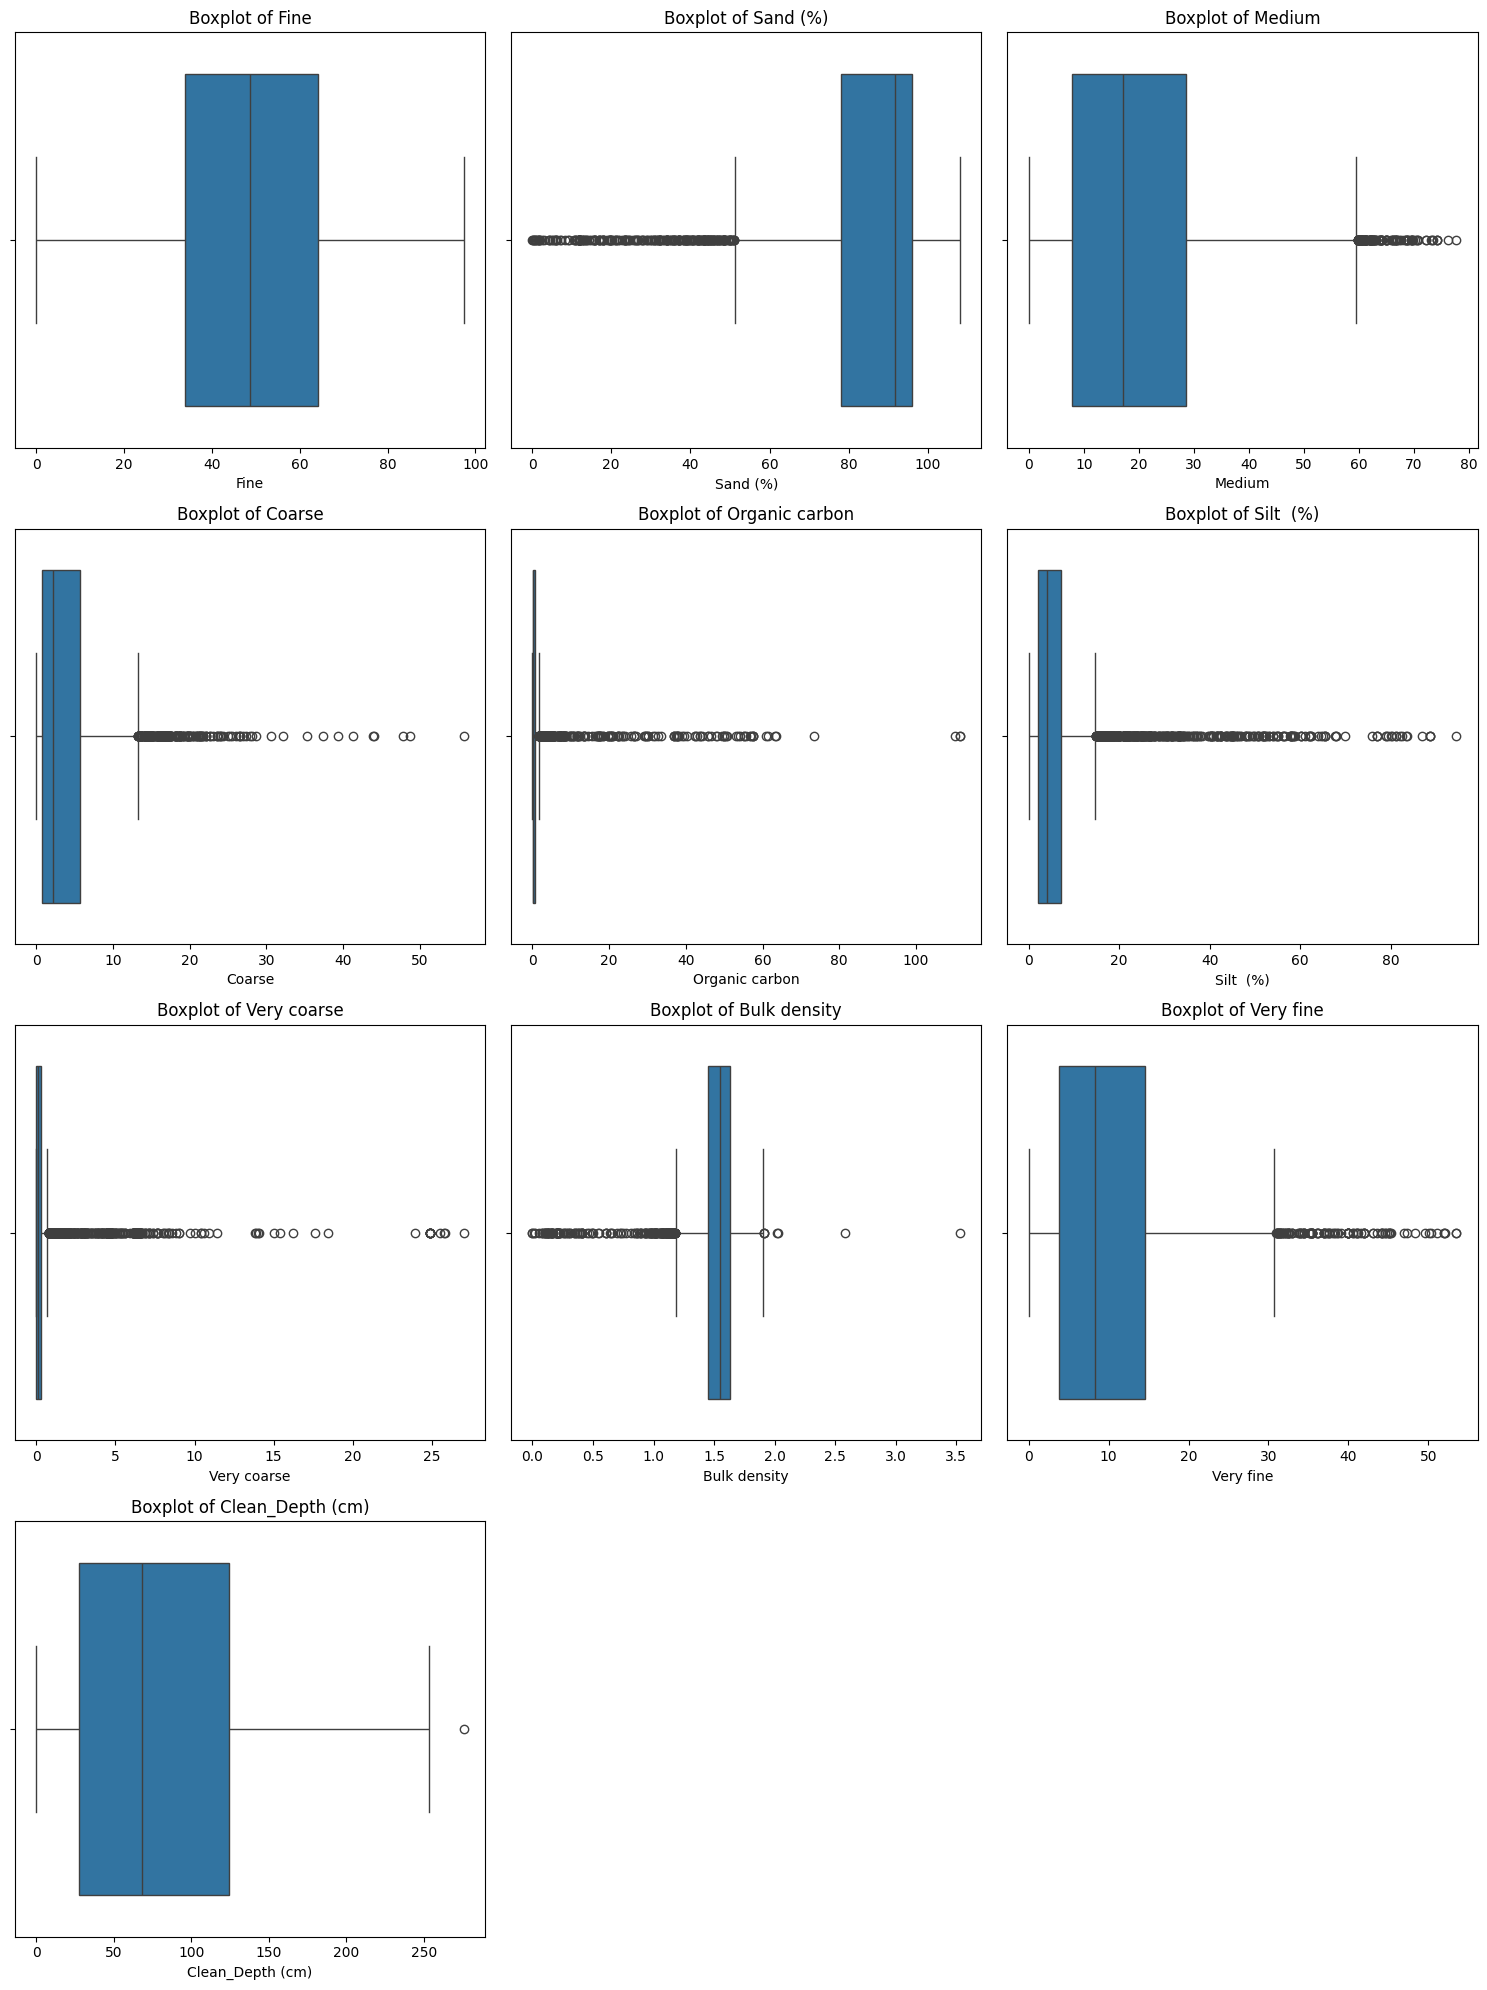

In [106]:
plot_boxplots(X_test_imputed, columns_to_check)

In [107]:
def get_iqr_bounds(df, columns, factor=1.5):
    bounds = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        bounds[col] = (lower, upper)
    return bounds

columns_to_check = ['Fine', 'Sand (%)', 'Medium', 'Coarse', 'Organic carbon', 'Silt  (%)',
                    'Very coarse', 'Bulk density', 'Very fine', 'Clean_Depth (cm)']
iqr_bounds = get_iqr_bounds(X_train_imputed, columns=columns_to_check)

def remove_outliers_with_bounds(df, bounds):
    df_clean = df.copy()
    for col, (lower, upper) in bounds.items():
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean, df_clean.index

X_train_imputed, train_valid_indices = remove_outliers_with_bounds(X_train_imputed, iqr_bounds)
X_test_imputed, test_valid_indices = remove_outliers_with_bounds(X_test_imputed, iqr_bounds)

y_train = y_train.loc[train_valid_indices]
y_test= y_test.loc[test_valid_indices]


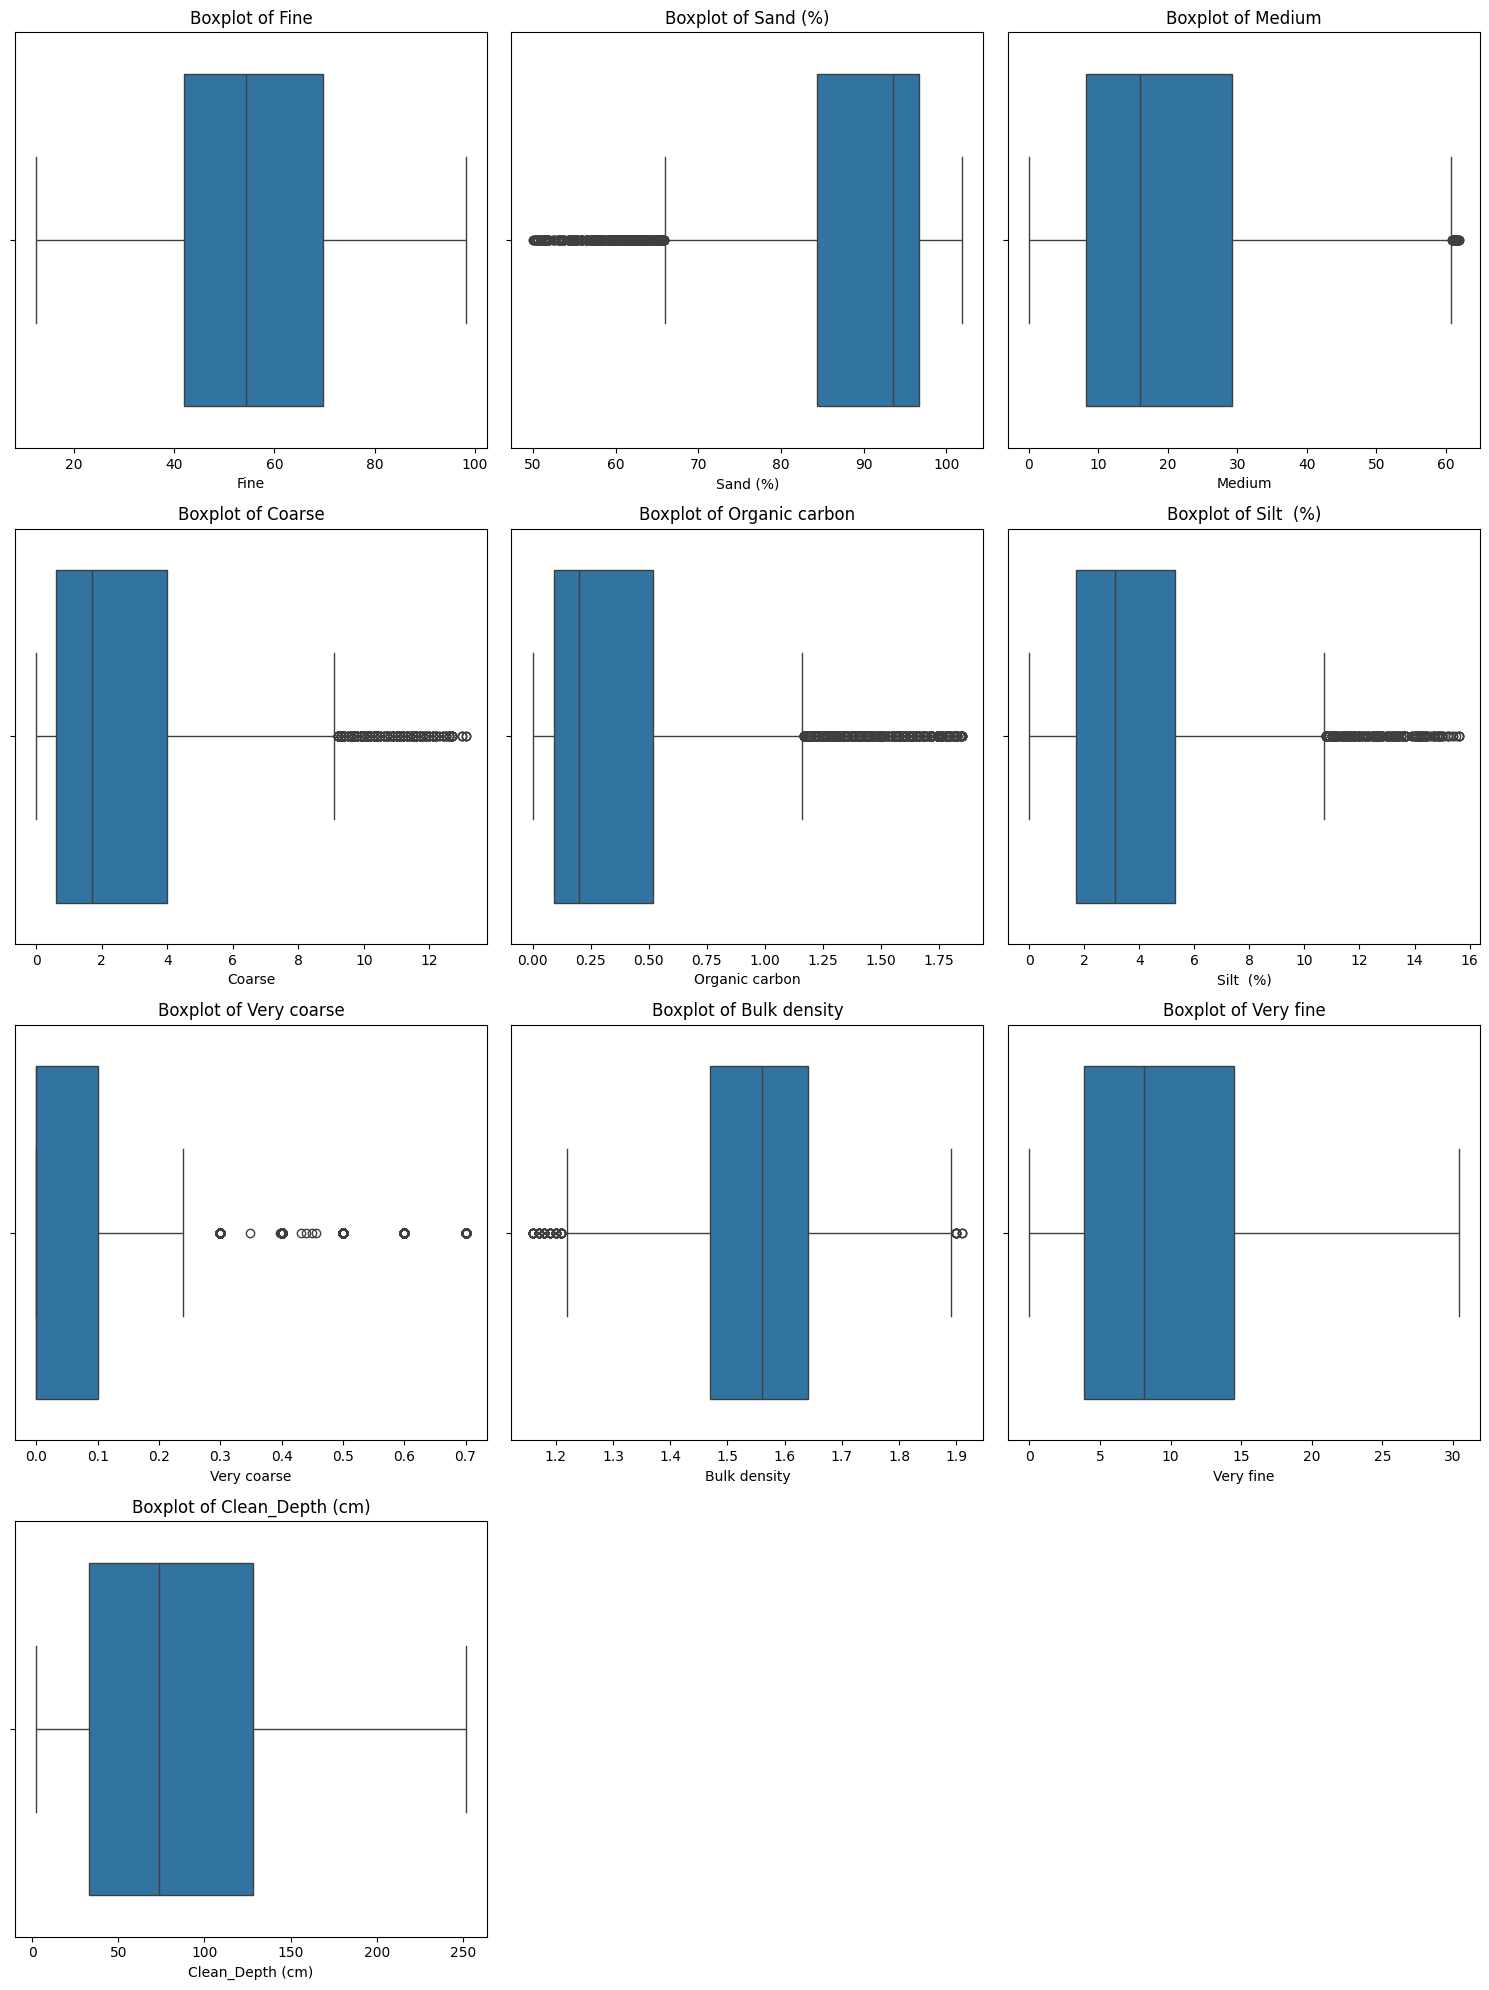

In [108]:

plot_boxplots(X_train_imputed, columns_to_check)

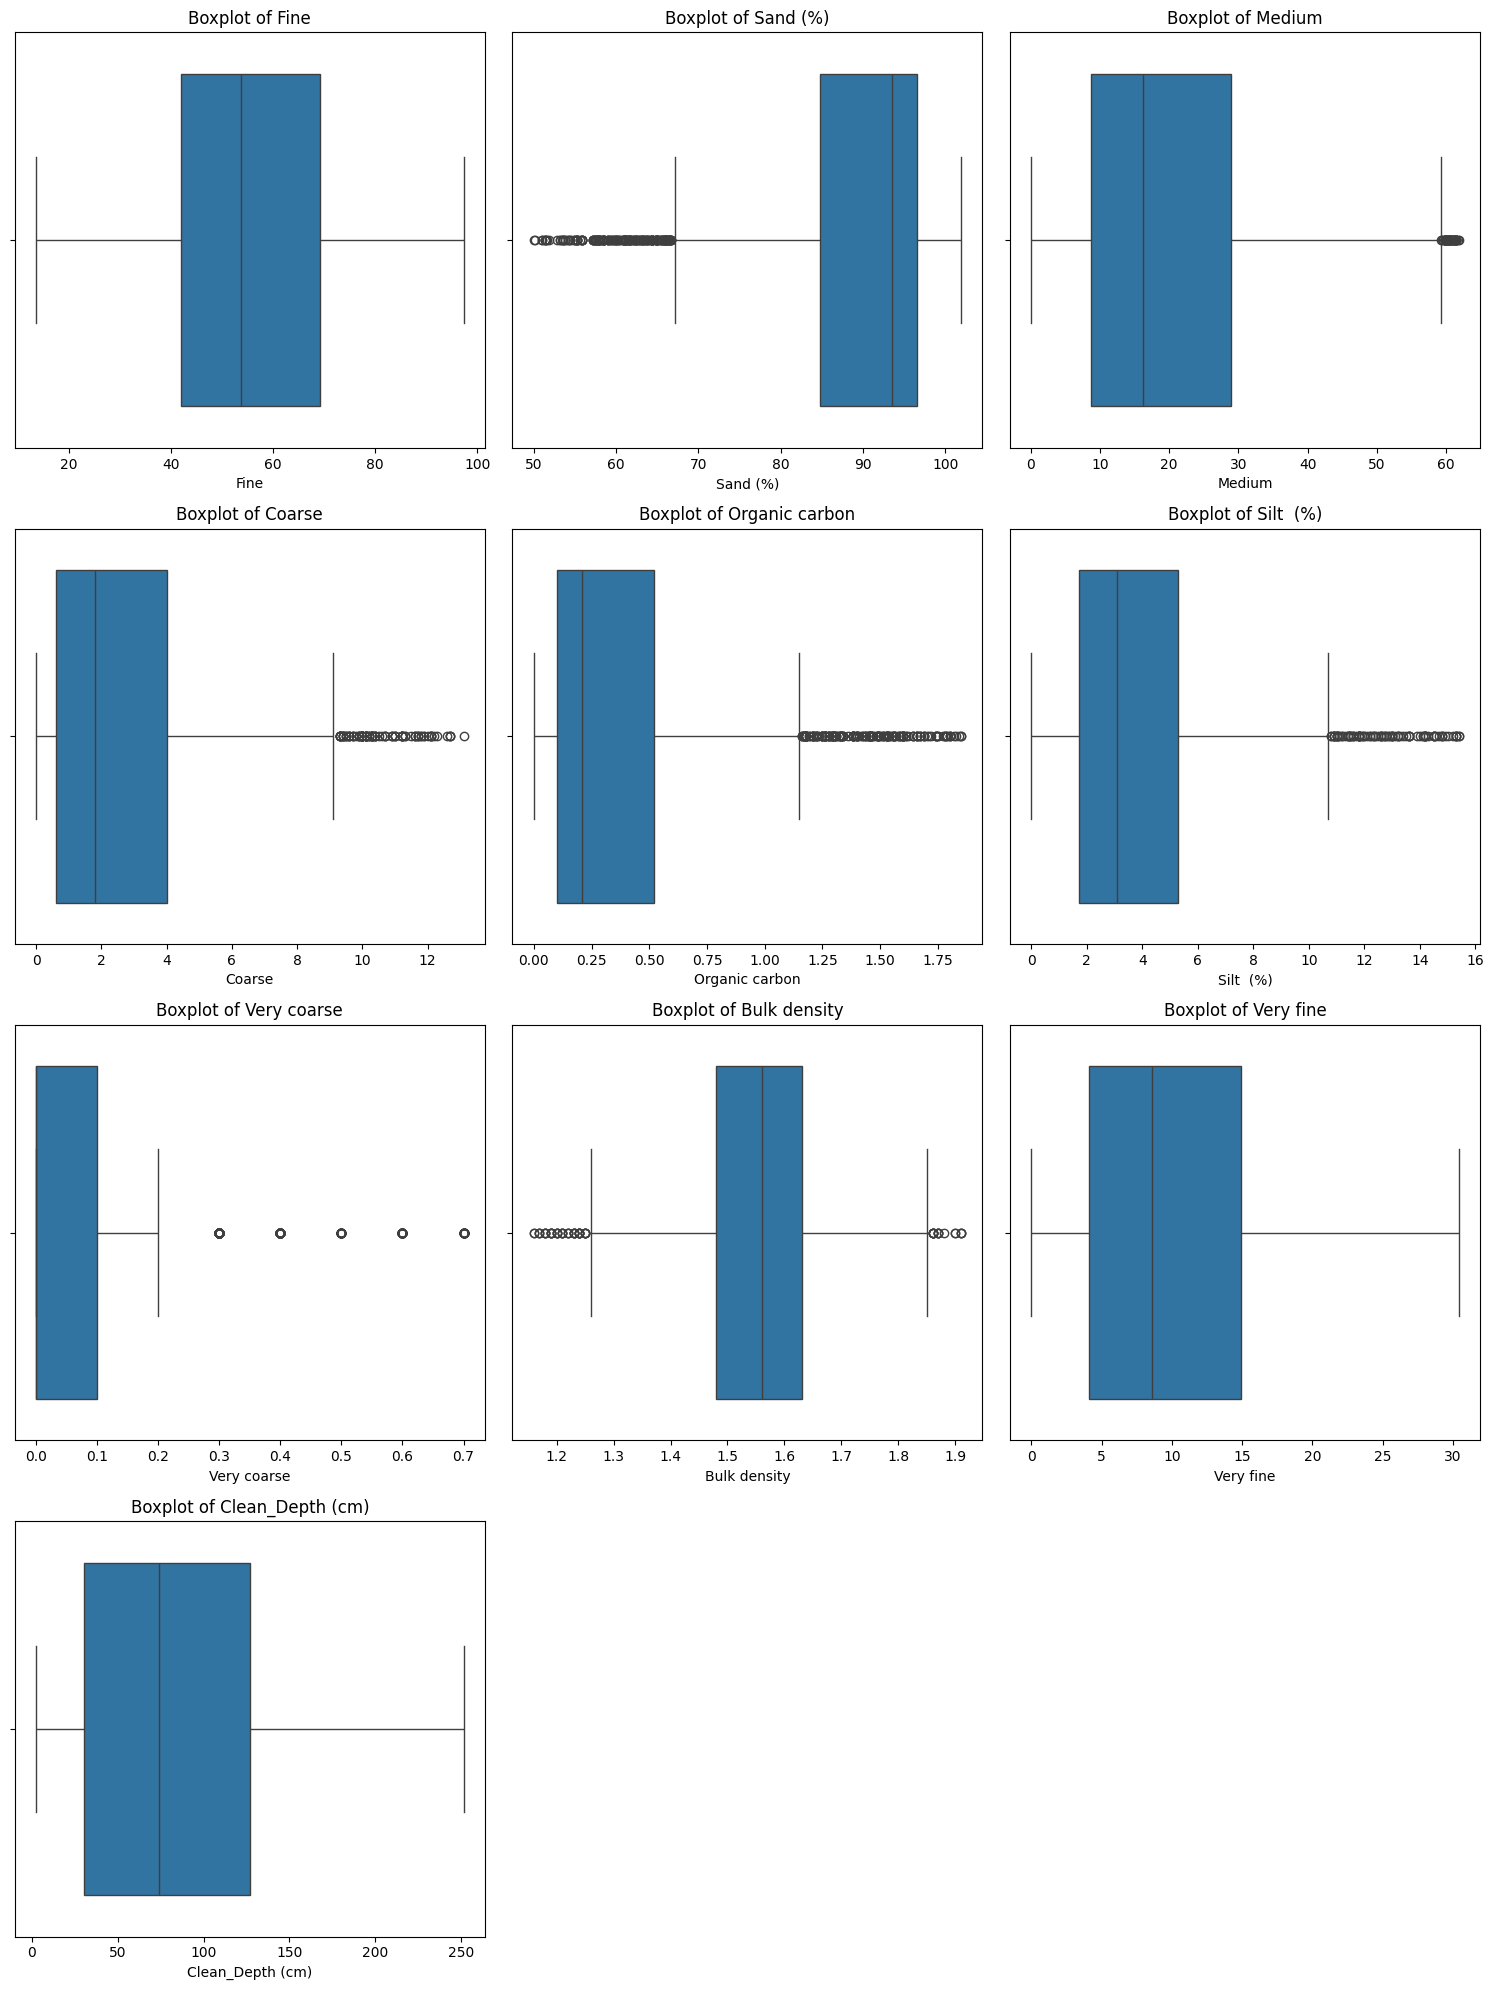

In [109]:
plot_boxplots(X_test_imputed, columns_to_check)

In [110]:
X_train_imputed.describe()

,Fine,Sand (%),Medium,Coarse,Organic carbon,Silt (%),Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Field/lab_lab,Method_constant head,Method_falling head,Horizon_label,Clean_Depth (cm)
count,10705.00000,10705.000000,10705.000000,10705.000000,10705.000000,10705.000000,10705.000000,10705.000000,10705.000000,10705.000000,10705.000000,10705.0,10705.0,10705.0,10705.000000,10705.000000
mean,56.34686,89.031438,20.043518,2.633518,0.376543,3.799844,0.093841,1.552960,9.896004,5.400392,3.000859,1.0,1.0,0.0,5.072863,83.296357
std,17.97197,10.877299,15.337679,2.634571,0.410338,2.857045,0.150583,0.125007,7.332291,0.028703,0.062872,0.0,0.0,0.0,1.671587,58.124473
min,12.50000,50.000000,0.100000,0.000000,0.000000,0.000000,0.000000,1.160000,0.000000,5.400000,3.000000,1.0,1.0,0.0,2.000000,2.500000
25%,42.00000,84.400000,8.200000,0.600000,0.090000,1.700000,0.000000,1.470000,3.900000,5.400000,3.000000,1.0,1.0,0.0,4.000000,33.000000
50%,54.40000,93.500000,16.000000,1.700000,0.200000,3.100000,0.000000,1.560000,8.100000,5.400000,3.000000,1.0,1.0,0.0,6.000000,73.500000
75%,69.70000,96.700000,29.200000,4.000000,0.520000,5.300000,0.100000,1.640000,14.500000,5.400000,3.000000,1.0,1.0,0.0,6.000000,128.000000
max,98.10000,101.902085,61.800000,13.100000,1.850000,15.600000,0.700000,1.910000,30.400000,7.500000,7.600000,1.0,1.0,0.0,11.000000,251.500000


In [111]:
X_test_imputed.describe()

,Fine,Sand (%),Medium,Coarse,Organic carbon,Silt (%),Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Field/lab_lab,Method_constant head,Method_falling head,Horizon_label,Clean_Depth (cm)
count,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.0,2756.0,2756.0,2756.000000,2756.000000
mean,55.857620,89.027504,20.205443,2.707271,0.376657,3.836981,0.100049,1.554539,10.142213,5.400762,3.001669,1.0,1.0,0.0,5.057692,82.433599
std,17.927686,10.889773,15.419325,2.650864,0.402209,2.881961,0.156022,0.122265,7.306762,0.040002,0.087623,0.0,0.0,0.0,1.668087,57.810633
min,13.600000,50.000000,0.100000,0.000000,0.000000,0.000000,0.000000,1.160000,0.000000,5.400000,3.000000,1.0,1.0,0.0,2.000000,2.500000
25%,42.000000,84.775000,8.675000,0.600000,0.100000,1.700000,0.000000,1.480000,4.100000,5.400000,3.000000,1.0,1.0,0.0,4.000000,30.500000
50%,53.650000,93.500000,16.200000,1.800000,0.210000,3.100000,0.000000,1.560000,8.600000,5.400000,3.000000,1.0,1.0,0.0,6.000000,74.000000
75%,69.100000,96.600000,28.900000,4.000000,0.520000,5.300000,0.100000,1.630000,14.900000,5.400000,3.000000,1.0,1.0,0.0,6.000000,127.000000
max,97.300000,101.902085,61.800000,13.100000,1.850000,15.400000,0.700000,1.910000,30.400000,7.500000,7.600000,1.0,1.0,0.0,11.000000,251.500000


In [112]:
print(y_train.describe())

count    10705.000000
mean        21.609674
std         24.441793
min          0.000000
25%          2.630000
50%         14.500000
75%         31.900000
max        504.000000
Name: Ksat_cm_hr, dtype: float64


In [113]:
print(y_test.describe())

count    2756.000000
mean       21.496315
std        24.568404
min         0.000000
25%         2.630000
50%        14.500000
75%        30.900000
max       250.000000
Name: Ksat_cm_hr, dtype: float64


C:\Users\satya\AppData\Local\Temp\ipykernel_4452\51181565.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([y_train, y_test], labels=['y_train', 'y_test'])


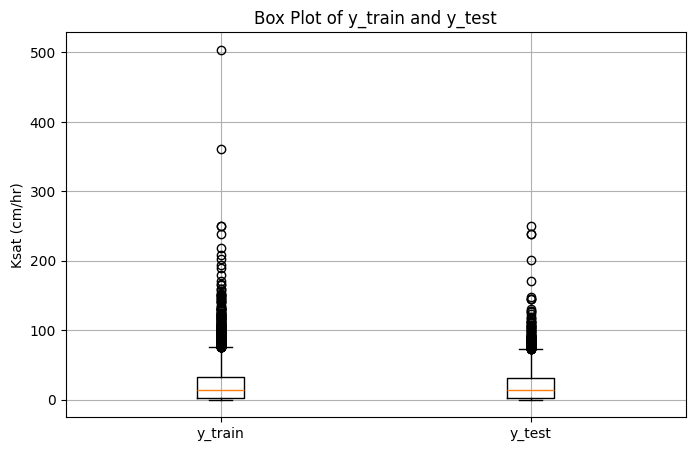

In [114]:
import matplotlib.pyplot as plt

def plot_box_y(y_train, y_test):
    plt.figure(figsize=(8, 5))
    plt.boxplot([y_train, y_test], labels=['y_train', 'y_test'])
    plt.title('Box Plot of y_train and y_test')
    plt.ylabel('Ksat (cm/hr)')
    plt.grid(True)
    plt.show()

plot_box_y(y_train, y_test)


In [115]:
y_train.describe()

count    10705.000000
mean        21.609674
std         24.441793
min          0.000000
25%          2.630000
50%         14.500000
75%         31.900000
max        504.000000
Name: Ksat_cm_hr, dtype: float64

In [116]:
y_test.describe()

count    2756.000000
mean       21.496315
std        24.568404
min         0.000000
25%         2.630000
50%        14.500000
75%        30.900000
max       250.000000
Name: Ksat_cm_hr, dtype: float64

In [117]:
y_train.shape

(10705,)

In [118]:
X_train_imputed.shape, y_train.shape, X_test_imputed.shape, y_test.shape

((10705, 16), (10705,), (2756, 16), (2756,))

In [119]:
print(X_train_imputed.isnull().sum())


Fine                    0
Sand (%)                0
Medium                  0
Coarse                  0
Organic carbon          0
Silt  (%)               0
Very coarse             0
Bulk density            0
Very fine               0
Sample Height (cm)      0
Sample diameter (cm)    0
Field/lab_lab           0
Method_constant head    0
Method_falling head     0
Horizon_label           0
Clean_Depth (cm)        0
dtype: int64


In [120]:
print(X_test_imputed.isnull().sum())

Fine                    0
Sand (%)                0
Medium                  0
Coarse                  0
Organic carbon          0
Silt  (%)               0
Very coarse             0
Bulk density            0
Very fine               0
Sample Height (cm)      0
Sample diameter (cm)    0
Field/lab_lab           0
Method_constant head    0
Method_falling head     0
Horizon_label           0
Clean_Depth (cm)        0
dtype: int64



In [121]:
X_train_imputed.head(10)

,Fine,Sand (%),Medium,Coarse,Organic carbon,Silt (%),Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Field/lab_lab,Method_constant head,Method_falling head,Horizon_label,Clean_Depth (cm)
10210,43.6,54.2,9.4,0.2,0.15,2.0,0.0,1.61,1.0,5.4,3.0,1.0,1.0,0.0,7.0,170.0
2732,61.8,93.0,12.8,0.2,1.83,4.5,0.0,1.32,18.2,5.4,3.0,1.0,1.0,0.0,2.0,9.0
9512,24.6,52.0,19.4,2.4,0.20,7.0,0.2,1.42,5.4,5.4,3.0,1.0,1.0,0.0,6.0,59.5
11673,94.7,98.5,2.0,0.1,0.06,1.1,0.0,1.27,1.7,5.4,3.0,1.0,1.0,0.0,4.0,31.5
14830,62.5,94.1,6.1,0.6,1.14,2.5,0.0,1.48,24.9,5.4,3.0,1.0,1.0,0.0,2.0,9.0
20059,45.2,62.9,3.3,2.0,0.26,9.7,0.7,1.63,11.7,5.4,3.0,1.0,1.0,0.0,6.0,54.5
8758,52.2,92.1,14.9,1.1,0.33,5.4,0.0,1.44,23.9,5.4,3.0,1.0,1.0,0.0,6.0,40.5
7952,54.0,95.4,20.9,3.4,0.08,2.8,0.1,1.58,17.0,5.4,3.0,1.0,1.0,0.0,4.0,91.5
7112,28.2,94.8,55.2,8.3,0.02,2.8,0.0,1.70,3.1,5.4,3.0,1.0,1.0,0.0,4.0,174.0
5602,28.7,61.8,18.2,4.6,0.10,5.6,0.3,1.70,10.0,5.4,3.0,1.0,1.0,0.0,6.0,176.5


In [122]:
X_test_imputed.head(10)

,Fine,Sand (%),Medium,Coarse,Organic carbon,Silt (%),Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Field/lab_lab,Method_constant head,Method_falling head,Horizon_label,Clean_Depth (cm)
2305,54.7,88.3,15.6,1.2,1.61,6.0,0.1,1.41,16.7,5.4,3.0,1.0,1.0,0.0,2.0,11.5
4153,76.4,93.4,0.9,0.0,0.37,3.8,0.0,1.38,16.1,5.4,3.0,1.0,1.0,0.0,4.0,57.5
9168,55.3,98.2,28.0,5.8,0.22,1.6,0.2,1.56,8.9,5.4,3.0,1.0,1.0,0.0,4.0,21.5
17629,48.7,98.7,42.4,3.1,0.18,1.0,0.0,1.54,4.5,5.4,3.0,1.0,1.0,0.0,4.0,31.5
10509,27.8,69.9,29.6,9.7,0.06,7.1,0.7,1.69,2.1,5.4,3.0,1.0,1.0,0.0,6.0,189.0
2955,45.5,92.4,37.1,3.8,0.82,5.1,0.2,1.46,5.8,5.4,3.0,1.0,1.0,0.0,6.0,30.5
3486,48.2,77.6,13.2,1.8,0.08,3.4,0.2,1.64,14.2,5.4,3.0,1.0,1.0,0.0,8.0,157.0
7776,68.7,89.2,11.9,0.8,1.00,3.1,0.0,1.41,7.8,5.4,3.0,1.0,1.0,0.0,2.0,9.0
13902,46.0,64.9,1.0,0.0,0.14,7.7,0.0,1.68,17.9,5.4,3.0,1.0,1.0,0.0,6.0,177.5
18020,50.7,88.1,19.3,3.9,1.03,5.4,0.2,1.53,14.0,5.4,3.0,1.0,1.0,0.0,2.0,10.0


In [123]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Separating numeric and categorical columns from the training and testing sets
X_train_imputed_num = X_train_imputed[['Fine','Sand (%)','Medium','Coarse','Organic carbon','Silt  (%)','Very coarse','Bulk density','Very fine','Sample Height (cm)','Sample diameter (cm)','Clean_Depth (cm)']]
X_test_imputed_num = X_test_imputed[['Fine','Sand (%)','Medium','Coarse','Organic carbon','Silt  (%)','Very coarse','Bulk density','Very fine','Sample Height (cm)','Sample diameter (cm)','Clean_Depth (cm)']]
X_train_imputed_cat = X_train_imputed[['Horizon_label','Field/lab_lab','Method_constant head','Method_falling head']]
X_test_imputed_cat = X_test_imputed[['Horizon_label','Field/lab_lab','Method_constant head','Method_falling head']]

# Initializing StandardScaler and scale the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed_num)
X_test_scaled = scaler.transform(X_test_imputed_num)

# Converting the scaled features back to DataFrames with the original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_imputed_num.columns, index=X_train_imputed.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_imputed_num.columns, index=X_test_imputed.index)

# Concatenate the scaled numeric features with the categorical features (keeping the index intact)
X_train_scaled = pd.concat([X_train_scaled, X_train_imputed_cat], axis=1)
X_test_scaled = pd.concat([X_test_scaled, X_test_imputed_cat], axis=1)

# Now X_train_final and X_test_final contain both scaled numeric features and original categorical features.


In [124]:
X_train_scaled.describe()

,Fine,Sand (%),Medium,Coarse,Organic carbon,Silt (%),Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Clean_Depth (cm),Horizon_label,Field/lab_lab,Method_constant head,Method_falling head
count,1.070500e+04,1.070500e+04,1.070500e+04,1.070500e+04,1.070500e+04,1.070500e+04,1.070500e+04,1.070500e+04,1.070500e+04,1.070500e+04,1.070500e+04,1.070500e+04,10705.000000,10705.0,10705.0,10705.0
mean,-3.318742e-16,-6.116442e-16,8.097731e-17,-3.185993e-17,6.902984e-17,-1.201385e-16,-2.389494e-17,-6.179498e-16,1.991245e-17,-2.544281e-14,2.142580e-15,-7.035734e-17,5.072863,1.0,1.0,0.0
std,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.671587,0.0,0.0,0.0
min,-2.439850e+00,-3.588507e+00,-1.300356e+00,-9.996472e-01,-9.176844e-01,-1.330053e+00,-6.232175e-01,-3.143665e+00,-1.349710e+00,-1.366980e-02,-1.366980e-02,-1.390122e+00,2.000000,1.0,1.0,0.0
25%,-7.983281e-01,-4.258092e-01,-7.722205e-01,-7.718955e-01,-6.983427e-01,-7.350047e-01,-6.232175e-01,-6.636796e-01,-8.177913e-01,-1.366980e-02,-1.366980e-02,-8.653619e-01,4.000000,1.0,1.0,0.0
50%,-1.083326e-01,4.108346e-01,-2.636453e-01,-3.543506e-01,-4.302584e-01,-2.449651e-01,-6.232175e-01,5.631604e-02,-2.449559e-01,-1.366980e-02,-1.366980e-02,-1.685489e-01,6.000000,1.0,1.0,0.0
75%,7.430328e-01,7.050390e-01,5.970206e-01,5.186977e-01,3.496232e-01,5.250973e-01,4.090073e-02,6.963122e-01,6.279362e-01,-1.366980e-02,-1.366980e-02,7.691378e-01,6.000000,1.0,1.0,0.0
max,2.323345e+00,1.183313e+00,2.722604e+00,3.972932e+00,3.591006e+00,4.130389e+00,4.025610e+00,2.856299e+00,2.796527e+00,7.315395e+01,7.315395e+01,2.893988e+00,11.000000,1.0,1.0,0.0


In [125]:
X_test_scaled.describe()

,Fine,Sand (%),Medium,Coarse,Organic carbon,Silt (%),Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Clean_Depth (cm),Horizon_label,Field/lab_lab,Method_constant head,Method_falling head
count,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.0,2756.0,2756.0
mean,-0.027224,-0.000362,0.010558,0.027996,0.000278,0.012999,0.041224,0.012630,0.033580,0.012879,0.012879,-0.014844,5.057692,1.0,1.0,0.0
std,0.997583,1.001193,1.005370,1.006231,0.980235,1.008768,1.036168,0.978110,0.996565,1.393732,1.393732,0.994647,1.668087,0.0,0.0,0.0
min,-2.378640,-3.588507,-1.300356,-0.999647,-0.917684,-1.330053,-0.623218,-3.143665,-1.349710,-0.013670,-0.013670,-1.390122,2.000000,1.0,1.0,0.0
25%,-0.798328,-0.391332,-0.741250,-0.771895,-0.673971,-0.735005,-0.623218,-0.583680,-0.790513,-0.013670,-0.013670,-0.908375,4.000000,1.0,1.0,0.0
50%,-0.150066,0.410835,-0.250605,-0.316392,-0.405887,-0.244965,-0.623218,0.056316,-0.176761,-0.013670,-0.013670,-0.159946,6.000000,1.0,1.0,0.0
75%,0.709646,0.695845,0.577460,0.518698,0.349623,0.525097,0.040901,0.616313,0.682492,-0.013670,-0.013670,0.751933,6.000000,1.0,1.0,0.0
max,2.278829,1.183313,2.722604,3.972932,3.591006,4.060383,4.025610,2.856299,2.796527,73.153947,73.153947,2.893988,11.000000,1.0,1.0,0.0


In [126]:
X_train_scaled.head(10)

,Fine,Sand (%),Medium,Coarse,Organic carbon,Silt (%),Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Clean_Depth (cm),Horizon_label,Field/lab_lab,Method_constant head,Method_falling head
10210,-0.709296,-3.202363,-0.693978,-0.923730,-0.552115,-0.629996,-0.623218,0.456314,-1.213321,-0.01367,-0.01367,1.491759,7.0,1.0,1.0,0.0
2732,0.303439,0.364865,-0.472292,-0.923730,3.542263,0.245075,-0.623218,-1.863672,1.132577,-0.01367,-0.01367,-1.278288,2.0,1.0,1.0,0.0
9512,-1.766548,-3.404629,-0.041959,-0.088640,-0.430258,1.120145,0.705019,-1.063677,-0.613207,-0.01367,-0.01367,-0.409423,6.0,1.0,1.0,0.0
11673,2.134153,0.870529,-1.176473,-0.961689,-0.771457,-0.945022,-0.623218,-2.263670,-1.117848,-0.01367,-0.01367,-0.891170,4.0,1.0,1.0,0.0
14830,0.342390,0.465998,-0.909145,-0.771895,1.860644,-0.454982,-0.623218,-0.583680,2.046386,-0.01367,-0.01367,-1.278288,2.0,1.0,1.0,0.0
20059,-0.620265,-2.402495,-1.091710,-0.240475,-0.284031,2.065222,4.025610,0.616313,0.246046,-0.01367,-0.01367,-0.495449,6.0,1.0,1.0,0.0
8758,-0.230751,0.282120,-0.335367,-0.582102,-0.113432,0.560100,-0.623218,-0.903678,1.909996,-0.01367,-0.01367,-0.736322,6.0,1.0,1.0,0.0
7952,-0.130591,0.585518,0.055844,0.290946,-0.722714,-0.349974,0.040901,0.216315,0.968910,-0.01367,-0.01367,0.141146,4.0,1.0,1.0,0.0
7112,-1.566226,0.530355,2.292271,2.150919,-0.868942,-0.349974,-0.623218,1.176309,-0.926903,-0.01367,-0.01367,1.560580,4.0,1.0,1.0,0.0
5602,-1.538404,-2.503628,-0.120201,0.746449,-0.673971,0.630106,1.369137,1.176309,0.014184,-0.01367,-0.01367,1.603593,6.0,1.0,1.0,0.0


In [127]:
X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((10705, 16), (10705,), (2756, 16), (2756,))

In [128]:
#Removing outliers in KSAT field training data
q1 = y_train.quantile(0.10)
q3 = y_train.quantile(0.90)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

mask = (y_train >= lower_bound) & (y_train <= upper_bound)
mask_2= (y_test >= lower_bound) & (y_test <= upper_bound)
X_train_scaled = X_train_scaled[mask]
y_train = y_train[mask]
X_test_scaled = X_test_scaled[mask_2]
y_test = y_test[mask_2]


In [129]:
X_train_scaled.shape, y_train.shape,X_test_scaled.shape, y_test.shape

((10673, 16), (10673,), (2747, 16), (2747,))

C:\Users\satya\AppData\Local\Temp\ipykernel_4452\581349541.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([y_train, y_test], labels=['y_train', 'y_test'])


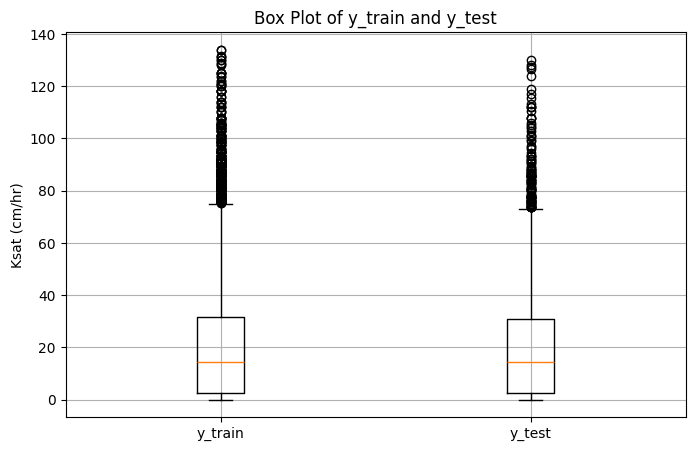

In [130]:
import matplotlib.pyplot as plt

def plot_box_y(y_train, y_test):
    plt.figure(figsize=(8, 5))
    plt.boxplot([y_train, y_test], labels=['y_train', 'y_test'])
    plt.title('Box Plot of y_train and y_test')
    plt.ylabel('Ksat (cm/hr)')
    plt.grid(True)
    plt.show()

# Call the function
plot_box_y(y_train, y_test)

In [131]:
y_train.describe()

count    10673.000000
mean        21.116289
std         22.395274
min          0.000000
25%          2.630000
50%         14.500000
75%         31.600000
max        134.000000
Name: Ksat_cm_hr, dtype: float64

In [132]:
y_test.describe()

count    2747.000000
mean       20.954621
std        22.575639
min         0.000000
25%         2.630000
50%        14.500000
75%        30.800000
max       130.150000
Name: Ksat_cm_hr, dtype: float64

In [133]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
model = XGBRegressor(max_depth=13)
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
y_test_pred=np.clip(y_test_pred, 0, None)  # Ensure predictions are non-negative
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test R^2: {test_r2:.4f}")

Test R^2: 0.9115


In [134]:
from sklearn.metrics import mean_squared_error
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test RMSE: {test_rmse:.4f} cm/hr")  # Units match your target


Test RMSE: 6.7165 cm/hr


In [135]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

model = XGBRegressor(max_depth=11)

# Function to calculate RMSE
def rmse_score(model, X, y):
    y_pred = model.predict(X)
    
    return np.sqrt(mean_squared_error(y, y_pred))

# K-fold cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')

# Convert the negative MSE to positive and calculate RMSE
rmse_scores = np.sqrt(-cv_scores)

print(f"Average RMSE from 10-fold cross-validation: {np.mean(rmse_scores):.4f} cm/hr")


Average RMSE from 10-fold cross-validation: 7.4607 cm/hr


In [136]:
df.shape

(20451, 17)

In [137]:
df.tail(20)

,Fine,Sand (%),Medium,Coarse,Organic carbon,Silt (%),Very coarse,Bulk density,Very fine,Sample Height (cm),Sample diameter (cm),Ksat_cm_hr,Field/lab_lab,Method_constant head,Method_falling head,Horizon_label,Clean_Depth (cm)
20436,NaN,12.9,NaN,NaN,NaN,75.9,NaN,1.19,NaN,2.0,5.0,0.684000,1.0,0.0,0.0,11,23.00
20437,NaN,17.8,NaN,NaN,NaN,74.5,NaN,1.42,NaN,2.0,5.0,0.324000,1.0,0.0,0.0,11,53.00
20438,NaN,25.1,NaN,NaN,NaN,72.5,NaN,1.40,NaN,2.0,5.0,0.576000,1.0,0.0,0.0,11,75.00
20439,NaN,45.2,NaN,NaN,NaN,52.0,NaN,1.44,NaN,2.0,5.0,0.900000,1.0,0.0,0.0,11,105.00
20440,NaN,4.4,NaN,NaN,NaN,92.2,NaN,1.27,NaN,2.0,5.0,0.432000,1.0,0.0,0.0,11,135.00
20441,NaN,38.6,NaN,NaN,NaN,54.3,NaN,0.84,NaN,2.0,5.0,158.400000,1.0,0.0,0.0,11,3.00
20442,NaN,61.5,NaN,NaN,NaN,31.3,NaN,0.98,NaN,2.0,5.0,25.200000,1.0,0.0,0.0,11,7.00
20443,NaN,58.1,NaN,NaN,NaN,34.7,NaN,1.56,NaN,2.0,5.0,1.224000,1.0,0.0,0.0,11,15.00
20444,NaN,60.8,NaN,NaN,NaN,34.4,NaN,1.50,NaN,2.0,5.0,1.476000,1.0,0.0,0.0,11,23.00
20445,NaN,50.9,NaN,NaN,NaN,42.3,NaN,1.42,NaN,2.0,5.0,1.260000,1.0,0.0,0.0,11,53.00


In [138]:
model.fit(X_train_scaled, y_train)

#feature importances
feature_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': model.feature_importances_
    
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (descending order):")
print(feature_importance)



Feature Importances (descending order):
                 Feature  Importance
1               Sand (%)    0.306122
8              Very fine    0.249894
2                 Medium    0.124026
4         Organic carbon    0.062662
6            Very coarse    0.062076
12         Horizon_label    0.039538
11      Clean_Depth (cm)    0.036399
5              Silt  (%)    0.036109
3                 Coarse    0.035541
7           Bulk density    0.032986
0                   Fine    0.014647
9     Sample Height (cm)    0.000000
10  Sample diameter (cm)    0.000000
13         Field/lab_lab    0.000000
14  Method_constant head    0.000000
15   Method_falling head    0.000000


# Feature Importance

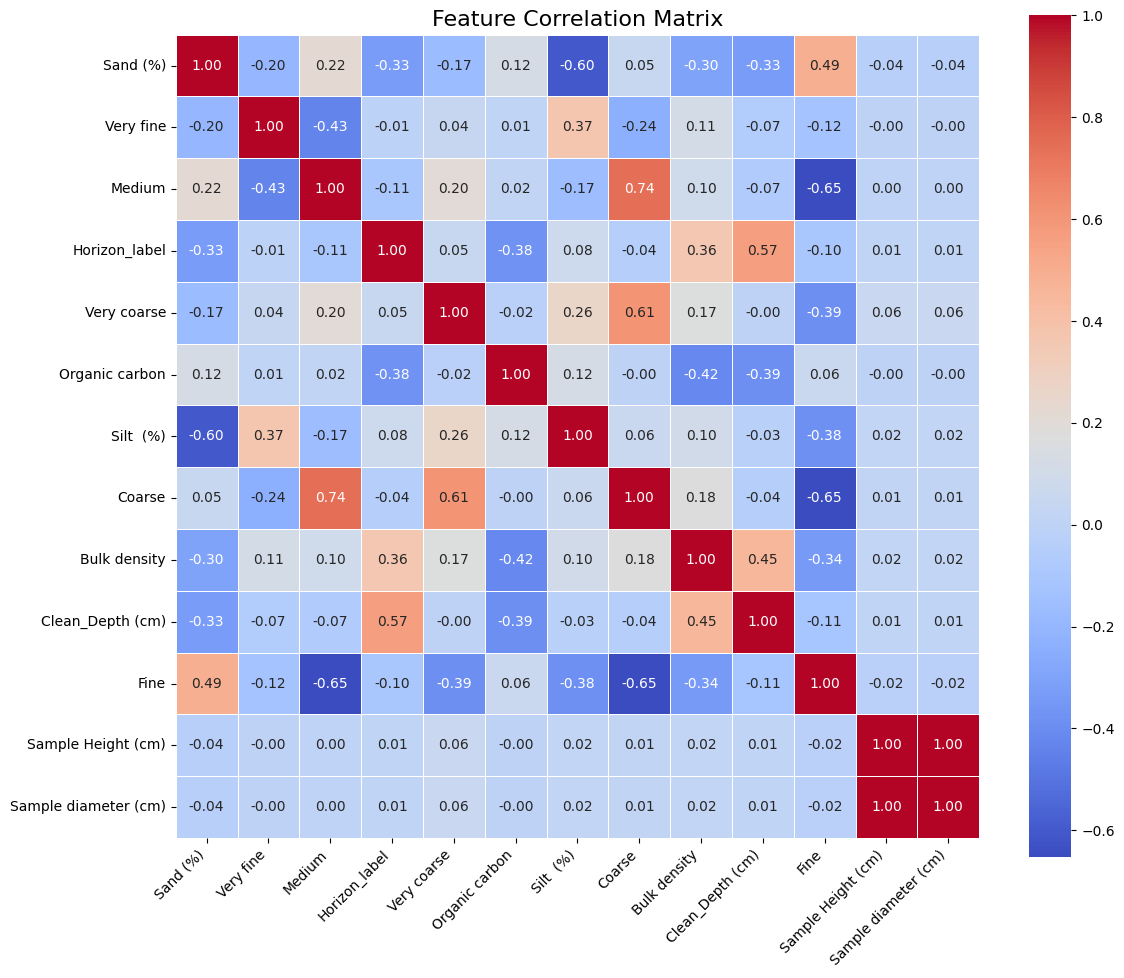

In [139]:
#Correlation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = [
    'Sand (%)', 'Very fine', 'Medium', 'Horizon_label', 'Very coarse',
    'Organic carbon', 'Silt  (%)', 'Coarse', 'Bulk density',
    'Clean_Depth (cm)', 'Fine', 'Sample Height (cm)', 'Sample diameter (cm)'
]

corr_data = X_train_scaled[selected_features]

corr_matrix = corr_data.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)

plt.title("Feature Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


c:\Users\satya\Documents\data_science_roadmap\KSAT\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


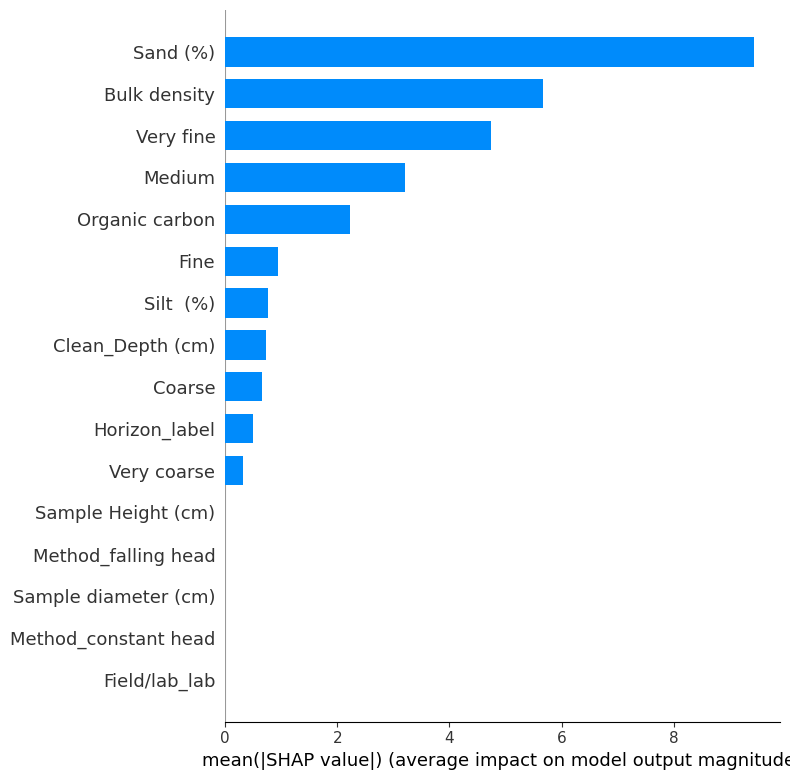

In [140]:
#SHAP VALUES FOR FEATURE IMPORTANCE
import shap
import matplotlib.pyplot as plt

model.fit(X_train_scaled, y_train)

explainer = shap.Explainer(model)
shap_values = explainer(X_train_scaled)

shap.summary_plot(shap_values, X_train_scaled, plot_type="bar")


In [141]:
test_df=pd.DataFrame(y_test_pred,y_test)

Removing sample diameter, sample height, Fiel/lab_lab because majority of samples are lab tested, removing falling head and constant head because majority of the data is constant

In [142]:
X_train_scaled.drop(columns=['Sample Height (cm)','Sample diameter (cm)','Field/lab_lab','Method_constant head','Method_falling head'], inplace=True)
X_test_scaled.drop(columns=['Sample Height (cm)','Sample diameter (cm)','Field/lab_lab','Method_constant head','Method_falling head'], inplace=True)

# Model Training

In [143]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
model = XGBRegressor(max_depth=13)
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
y_test_pred=np.clip(y_test_pred, 0, None)  # Ensure predictions are non-negative
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test R^2: {test_r2:.4f}")

Test R^2: 0.9115


In [144]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

model = XGBRegressor(max_depth=11)

def rmse_score(model, X, y):
    y_pred = model.predict(X)
    
    return np.sqrt(mean_squared_error(y, y_pred))

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-cv_scores)

print(f"Average RMSE from 10-fold cross-validation: {np.mean(rmse_scores):.4f} cm/hr")


Average RMSE from 10-fold cross-validation: 7.4607 cm/hr


# Stacking Model

XGBoost, LightGBM, CatBoost

In [145]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

def objective(trial):
    params = {
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "n_jobs": -1
    }

    model = XGBRegressor(**params)

    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring="neg_mean_squared_error")
    rmse = np.sqrt(-cv_scores.mean())
    return rmse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

print("Best RMSE: {:.4f} cm/hr".format(study.best_value))
print("Best hyperparameters:", study.best_params)


[I 2025-08-26 11:21:39,133] A new study created in memory with name: no-name-626df032-2124-464f-8fe1-8350bf03654f
[I 2025-08-26 11:22:14,841] Trial 0 finished with value: 6.990872502676113 and parameters: {'max_depth': 15, 'learning_rate': 0.03969913640338266, 'n_estimators': 786, 'subsample': 0.6827786108850755, 'colsample_bytree': 0.537713790472135, 'gamma': 2.89023898900021, 'reg_alpha': 0.7515168328747873, 'reg_lambda': 2.3578744134359164}. Best is trial 0 with value: 6.990872502676113.
[I 2025-08-26 11:22:14,841] Trial 0 finished with value: 6.990872502676113 and parameters: {'max_depth': 15, 'learning_rate': 0.03969913640338266, 'n_estimators': 786, 'subsample': 0.6827786108850755, 'colsample_bytree': 0.537713790472135, 'gamma': 2.89023898900021, 'reg_alpha': 0.7515168328747873, 'reg_lambda': 2.3578744134359164}. Best is trial 0 with value: 6.990872502676113.
[I 2025-08-26 11:22:16,655] Trial 1 finished with value: 10.982008837788698 and parameters: {'max_depth': 4, 'learning_rat

Best RMSE: 6.9678 cm/hr
Best hyperparameters: {'max_depth': 14, 'learning_rate': 0.08656083565189002, 'n_estimators': 585, 'subsample': 0.7882854327622473, 'colsample_bytree': 0.6259653586681276, 'gamma': 2.20483049703611, 'reg_alpha': 3.255835048411921, 'reg_lambda': 4.452310443143287}


In [146]:


best_params = study.best_params

best_model = XGBRegressor(**best_params)

best_model.fit(X_train_scaled, y_train)

y_pred_test = best_model.predict(X_test_scaled)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Test RMSE: {test_rmse:.4f} cm/hr")




Test RMSE: 6.4260 cm/hr


In [147]:
import optuna
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

def lgb_objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "num_leaves": trial.suggest_int("num_leaves", 20, 300),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "n_jobs": -1,
        "verbose": -1
        
    }

    model = LGBMRegressor(**params)
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, 
                                 cv=10, scoring="neg_mean_squared_error")
    rmse = np.sqrt(-cv_scores.mean())
    return rmse

lgb_study = optuna.create_study(direction="minimize")
lgb_study.optimize(lgb_objective, n_trials=10)

print("Best RMSE (LightGBM): {:.4f} cm/hr".format(lgb_study.best_value))
print("Best hyperparameters (LightGBM):", lgb_study.best_params)


[I 2025-08-26 11:23:45,487] A new study created in memory with name: no-name-94871ec8-7108-4d0a-80ad-b56ceccd41bc
[I 2025-08-26 11:23:47,729] Trial 0 finished with value: 9.742138179821259 and parameters: {'n_estimators': 868, 'learning_rate': 0.15130039444592688, 'max_depth': 3, 'num_leaves': 67, 'min_child_samples': 95, 'subsample': 0.9063280260097533, 'colsample_bytree': 0.6086635250153788, 'reg_alpha': 3.464765739577878, 'reg_lambda': 0.27756538920259977}. Best is trial 0 with value: 9.742138179821259.
[I 2025-08-26 11:23:47,729] Trial 0 finished with value: 9.742138179821259 and parameters: {'n_estimators': 868, 'learning_rate': 0.15130039444592688, 'max_depth': 3, 'num_leaves': 67, 'min_child_samples': 95, 'subsample': 0.9063280260097533, 'colsample_bytree': 0.6086635250153788, 'reg_alpha': 3.464765739577878, 'reg_lambda': 0.27756538920259977}. Best is trial 0 with value: 9.742138179821259.
[I 2025-08-26 11:23:49,179] Trial 1 finished with value: 10.583130527801211 and parameters

Best RMSE (LightGBM): 7.1944 cm/hr
Best hyperparameters (LightGBM): {'n_estimators': 640, 'learning_rate': 0.1284627537501428, 'max_depth': 15, 'num_leaves': 247, 'min_child_samples': 32, 'subsample': 0.9706685590507704, 'colsample_bytree': 0.8107038353963714, 'reg_alpha': 3.9754659169916025, 'reg_lambda': 1.8852884573486273}


In [148]:


best_params_2 = lgb_study.best_params

best_model_2 = LGBMRegressor(**best_params_2)

best_model_2.fit(X_train_scaled, y_train)

y_pred_test = best_model_2.predict(X_test_scaled)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Test RMSE: {test_rmse:.4f} cm/hr")




Test RMSE: 6.4894 cm/hr


In [149]:
import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

def catboost_objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000),
        "depth": trial.suggest_int("depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 1),
        "random_strength": trial.suggest_float("random_strength", 0, 1),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "verbose": 0,
        "random_state": 42
    }

    model = CatBoostRegressor(**params)
    score = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())
    return rmse

cat_study = optuna.create_study(direction="minimize")
cat_study.optimize(catboost_objective, n_trials=10)

print(f"Best RMSE (CatBoost): {cat_study.best_value:.4f} cm/hr")
print("Best hyperparameters (CatBoost):", cat_study.best_params)


[I 2025-08-26 11:24:50,452] A new study created in memory with name: no-name-173b160f-184c-4e93-b7d3-6567cb4f168f
[I 2025-08-26 11:26:26,674] Trial 3 finished with value: 8.132410463041495 and parameters: {'iterations': 160, 'depth': 9, 'learning_rate': 0.2711181213744564, 'l2_leaf_reg': 6.4520205745701285, 'bagging_temperature': 0.14714931538391873, 'random_strength': 0.11655524363034653, 'border_count': 130}. Best is trial 0 with value: 7.53641330884757.
[I 2025-08-26 11:26:42,071] Trial 4 finished with value: 10.267207532928012 and parameters: {'iterations': 710, 'depth': 4, 'learning_rate': 0.05380948334392413, 'l2_leaf_reg': 7.132074936017093, 'bagging_temperature': 0.21067359317079082, 'random_strength': 0.821440533552317, 'border_count': 34}. Best is trial 0 with value: 7.53641330884757.
[I 2025-08-26 11:26:50,396] Trial 5 finished with value: 8.997805492048666 and parameters: {'iterations': 178, 'depth': 7, 'learning_rate': 0.25454184773139266, 'l2_leaf_reg': 9.912561247877013,

Best RMSE (CatBoost): 7.5364 cm/hr
Best hyperparameters (CatBoost): {'iterations': 402, 'depth': 10, 'learning_rate': 0.17250078651686146, 'l2_leaf_reg': 9.839581809760315, 'bagging_temperature': 0.4729136596950734, 'random_strength': 0.30099282745779854, 'border_count': 76}


In [150]:


best_params_3 = cat_study.best_params

best_model_3 = CatBoostRegressor(**best_params_3)

best_model_3.fit(X_train_scaled, y_train)

y_pred_test = best_model_3.predict(X_test_scaled)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Test RMSE: {test_rmse:.4f} cm/hr")




0:	learn: 20.1890496	total: 31.4ms	remaining: 12.6s
1:	learn: 18.4215813	total: 50.4ms	remaining: 10.1s
2:	learn: 16.9889206	total: 72.9ms	remaining: 9.69s
3:	learn: 15.7857163	total: 83.1ms	remaining: 8.27s
4:	learn: 14.7519630	total: 95.7ms	remaining: 7.59s
5:	learn: 13.9415358	total: 107ms	remaining: 7.06s
6:	learn: 13.3454299	total: 117ms	remaining: 6.62s
7:	learn: 12.8107709	total: 130ms	remaining: 6.39s
8:	learn: 12.3706896	total: 142ms	remaining: 6.22s
9:	learn: 11.9557902	total: 155ms	remaining: 6.08s
10:	learn: 11.6065877	total: 169ms	remaining: 6.01s
11:	learn: 11.3033249	total: 181ms	remaining: 5.88s
12:	learn: 11.0890822	total: 196ms	remaining: 5.86s
13:	learn: 10.8736149	total: 208ms	remaining: 5.76s
14:	learn: 10.6881059	total: 219ms	remaining: 5.66s
15:	learn: 10.5236654	total: 230ms	remaining: 5.55s
8:	learn: 12.3706896	total: 142ms	remaining: 6.22s
9:	learn: 11.9557902	total: 155ms	remaining: 6.08s
10:	learn: 11.6065877	total: 169ms	remaining: 6.01s
11:	learn: 11.30332

In [151]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

xgb_model = XGBRegressor(**best_params)        # Optuna-tuned params for XGBoost
lgb_model = LGBMRegressor(**best_params_2)     # Optuna-tuned params for LightGBM
cat_model = CatBoostRegressor(**best_params_3, verbose=0)  # Optuna-tuned for CatBoost

final_estimator = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Customize as needed

stack_model = StackingRegressor(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cat', cat_model)
    ],
    final_estimator=final_estimator,
    cv=5,
    passthrough=True,
    n_jobs=-1
)

stack_model.fit(X_train_scaled, y_train)

y_pred_stack = stack_model.predict(X_test_scaled)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_stack))
print(f"Test RMSE: {test_rmse:.4f} cm/hr")

cv_scores_stack = cross_val_score(
    stack_model,
    X_train_scaled,
    y_train,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

rmse_scores_stack = np.sqrt(-cv_scores_stack)
print(f"Average CV RMSE (10-fold): {np.mean(rmse_scores_stack):.4f} cm/hr")


Test RMSE: 6.2903 cm/hr
Average CV RMSE (10-fold): 6.8680 cm/hr
Average CV RMSE (10-fold): 6.8680 cm/hr


In [153]:
# Calculate R² for stacked model using 10-fold cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score

# Define a custom scorer for R²
r2_scorer = make_scorer(r2_score)

# Perform 10-fold cross-validation
cv_r2_scores = cross_val_score(stack_model, X_train_scaled, y_train, cv=10, scoring=r2_scorer)

# Calculate mean R² across folds
mean_r2 = cv_r2_scores.mean()
print(f"Mean R² for stacked model (10-fold CV): {mean_r2:.4f}")

Mean R² for stacked model (10-fold CV): 0.9050


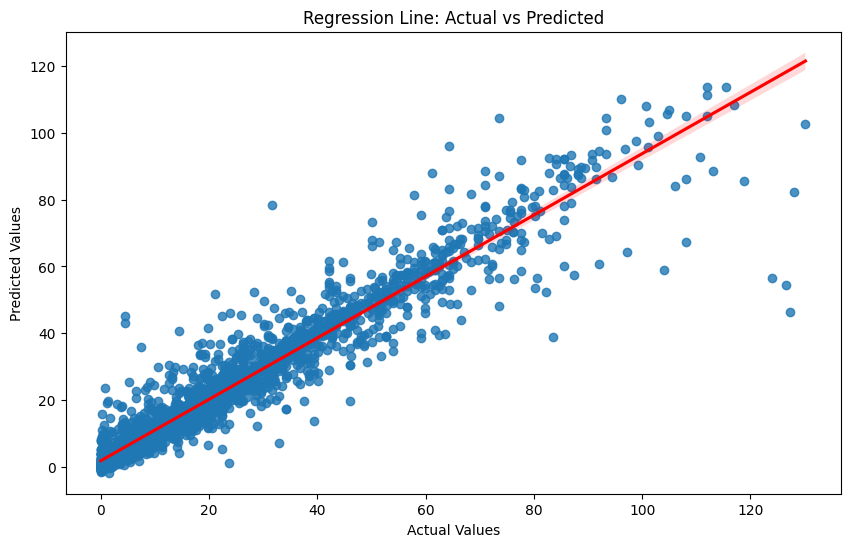

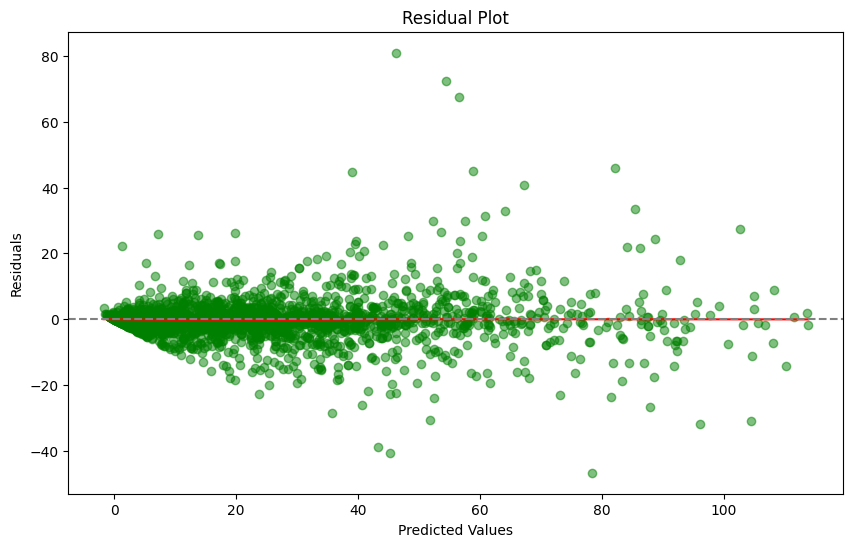

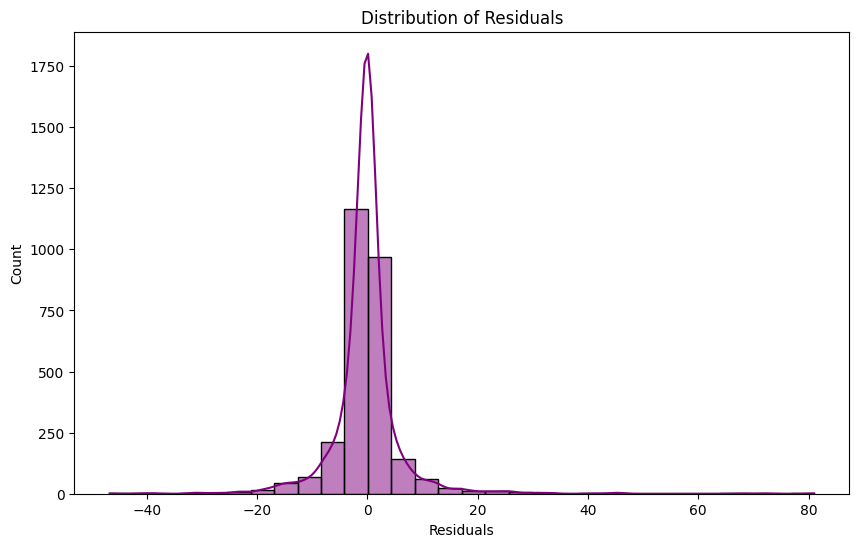

In [159]:
# Plotting regression line and other graphs for predictions
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_stack, line_kws={"color": "red"})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Line: Actual vs Predicted")
plt.show()

# Residual plot
residuals = y_test - y_pred_stack
plt.figure(figsize=(10, 6))
# Use statsmodels' lowess for smoothing
smoothed = lowess(residuals, y_pred_stack)
plt.scatter(y_pred_stack, residuals, alpha=0.5, color="green")
plt.plot(smoothed[:, 0], smoothed[:, 1], color="red")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(0, color='gray', linestyle='--')
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

###  Analysis of the Graphs

1. **Regression Line: Actual vs Predicted**
   - **Positive**: The scatter plot with the regression line demonstrates a strong alignment between the actual and predicted values, indicating that the model captures the underlying patterns in the data effectively.
   - **Negative**: Some points deviate significantly from the regression line, suggesting that the model may struggle with certain data points or outliers.

2. **Residual Plot**
   - **Positive**: The residual plot shows a random scatter of residuals around the zero line, which is a good indication of no systematic errors in the model. This highlights the robustness of the model in handling the data.
   - **Negative**: There may be slight clustering or patterns in certain areas, which could indicate potential issues like heteroscedasticity or areas where the model's predictions could be improved.

3. **Distribution of Residuals**
   - **Positive**: The histogram of residuals reveals a distribution centered around zero, indicating that the model's errors are unbiased. The roughly normal distribution suggests that the model's assumptions about the data are valid.
   - **Negative**: There may be slight skewness or heavy tails in the distribution, which could indicate that the model is not fully capturing certain aspects of the data or that there are outliers affecting the results.